# Universidade de Brasília
## Programa de Pós-Graduação em Computação Aplicada
## Mestrato Profissional em Computação Aplicada
### Mineração de Dados
#### Professor: Marcelo Ladeira
#### Alunos: 
##### 22000xxxx - Alisson Melo Rios
##### 220005401 - Filipe Oliveira da Silva
##### 220005559 - Luís Eduardo Barreiro de Jesus


## 1. PREPARAÇÃO DO AMBIENTE DE PROCESSAMENTO

In [1]:
# Preparação do Ambiente
## Seção de bibliotecas
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from mlxtend.frequent_patterns import apriori, association_rules

import datetime 

import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster

from apyori import apriori

In [2]:
# Exportar dataframe para arquivo 
#dftc = pd.read_csv("mycsv.csv", decimal=".", dtype={'anomes_nr': 'str'}, sep=",") # parse_dates=True
#dftc = pd.read_csv("mycsv.csv", decimal=".", dtype={'anomes_nr': 'str'}, sep=",") # parse_dates=True
#dftc = pd.read_csv("csv_tudo.csv", decimal=".", dtype={'anomes_nr': 'str'}, sep=",", encoding='Latin1') # parse_dates=True
dftc = pd.read_csv("./dados/csv_acidentes.csv", decimal=".", dtype={'anomes_nr': 'str'}, sep=",", encoding='utf-8') # parse_dates=True
    #dtype={'br': 'str', 'id': 'int64'}
#mycsv = dftc.to_csv(r'/Users/luisjesus/desenv/MPCA/MPCA_MD/mycsv.csv', sep=',', na_rep='', header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', chunksize=None, date_format='%Y%m%d', doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

In [3]:
dftc = dftc.drop(columns=['Unnamed: 0'])
dftc

id  data_inversa    dia_semana  uf      br     km  \
0        364155      20081004  QUINTA-FEIRA  DF  BR-040    1.1   
1        380607      20080521  QUARTA-FEIRA  DF  BR-040    1.1   
2       1151193      20120803   SEXTA-FEIRA  DF  BR-040    1.1   
3       1229094      20130101   TERÇA-FEIRA  DF  BR-040    1.1   
4       1232947      20130109  QUARTA-FEIRA  DF  BR-040    1.1   
...         ...           ...           ...  ..     ...    ...   
62834  83529775      20161230   SEXTA-FEIRA  MG  BR-040  695.1   
62835  83529840      20161222  QUINTA-FEIRA  MG  BR-040  522.0   
62836  83529865      20160826   SEXTA-FEIRA  MG  BR-040  573.0   
62837    174443      20070201   TERÇA-FEIRA  MG  BR-040  719.4   
62838    246937      20070629   SEXTA-FEIRA  MG  BR-040  772.1   

                 municipio                      causa_acidente  \
0                 BRASILIA                              OUTRAS   
1                 BRASILIA                    FALTA DE ATENÇÃO   
2                 BRASILIA  NÃO GUARDAR DISTÂNCIA DE SEGURANÇA   
3                 BRASILIA                    FALTA DE ATENÇÃO   
4                 BRASILIA                    FALTA DE ATENÇÃO   
...                    ...                                 ...   
62834  ALFREDO VASCONCELOS                              OUTRAS   
62835             CONTAGEM                              OUTRAS   
62836            ITABIRITO                              OUTRAS   
62837            BARBACENA             VELOCIDADE INCOMPATÍVEL   
62838         JUIZ DE FORA         DESOBEDIÊNCIA À SINALIZAÇÃO   

          tipo_acidente classificacao_acidente  ... hora minuto secao  \
0       COLISÃO LATERAL    COM VÍTIMAS FERIDAS  ...    7     50     1   
1      COLISÃO TRASEIRA            SEM VÍTIMAS  ...    8     20     1   
2      COLISÃO TRASEIRA            SEM VÍTIMAS  ...   16     45     1   
3           CAPOTAMENTO            SEM VÍTIMAS  ...   15     30     1   
4       COLISÃO LATERAL    COM VÍTIMAS FERIDAS  ...   17     30     1   
...                 ...                    ...  ...  ...    ...   ...   
62834   COLISÃO LATERAL     COM VÍTIMAS FATAIS  ...   14      0     3   
62835  COLISÃO TRASEIRA    COM VÍTIMAS FERIDAS  ...   17     20     3   
62836   COLISÃO FRONTAL     COM VÍTIMAS FATAIS  ...    2      5     3   
62837    SAÍDA DE PISTA    COM VÍTIMAS FERIDAS  ...   13     30     3   
62838  COLISÃO TRASEIRA    COM VÍTIMAS FERIDAS  ...   12     15     3   

      pos_concessao trecho_duplicado ilesos  feridos_leves  feridos_graves  \
0                 0                0      1              2               0   
1                 0                0      2              0               0   
2                 0                0      2              0               0   
3                 0                0      3              0               0   
4                 0                0      1              1               0   
...             ...              ...    ...            ...             ...   
62834             1                0      1              0               0   
62835             1                0      1              0               1   
62836             1                0      1              9               1   
62837             0                0      0              0               1   
62838             0                0      1              0               2   

       mortos  target  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0  
...       ...     ...  
62834       1       1  
62835       0       1  
62836       3       1  
62837       0       1  
62838       0       1  

[62839 rows x 33 columns]

## 3. ESTATÍSTICA DESCRITIVA - Acidentes

### 3.1. Acidentes - Criar Dataframe

Criar o Dataframe com os dados de acidentes

### 3.2. Quantitativo de Acidentes

#### 3.2.1 Acidentes x Classificação do Acidente


# ANTES DA CONCESSÃO

In [4]:
dfa = dftc[(dftc['pos_concessao']==0)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                        
200701     172  0.726744       1.290698        0.424419  0.127907
200702     134  0.716418       1.223881        0.455224  0.126866
200703     136  0.647059       1.227941        0.441176  0.080882
200704     165  0.690909       1.157576        0.509091  0.096970
200705     137  0.722628       1.197080        0.452555  0.160584
...        ...       ...            ...             ...       ...
201408     167  0.814371       1.035928        0.419162  0.101796
201409     163  0.699387       1.177914        0.453988  0.165644
201410     192  0.776042       1.098958        0.343750  0.093750
201411     231  0.865801       1.134199        0.380952  0.069264
201412     202  0.712871       1.287129        0.415842  0.079208

[96 rows x 5 columns]

In [5]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count   96.000000  96.000000      96.000000       96.000000  96.000000
mean   183.729167   0.793405       1.158919        0.423759   0.111507
std     24.417198   0.087901       0.110758        0.063180   0.030685
min    134.000000   0.610465       0.915344        0.285714   0.049107
25%    163.000000   0.725715       1.078451        0.378536   0.089101
50%    184.500000   0.795412       1.161830        0.421790   0.107644
75%    202.000000   0.858426       1.223483        0.466280   0.128314
max    244.000000   1.013793       1.513369        0.560976   0.187500

## ANTES DA CONCESSÃO - TODO O TRECHO CONCEDIDO
**Somente acidentes com vítimas**

* A média de mortes por acidentes 0,113546
* A mediana de mortes por acidentes 0,107214

* A média de feridos_graves por acidentes 0.423694
* A mediana de feridos_graves por acidentes 0.417410

* A média de feridos_leves por acidentes 1.158943
* A mediana de feridos_leves por acidentes 1.146359

* A média de acidentes por acidentes 186.260417
* A mediana de acidentes por acidentes 190.000000


In [6]:
dfa = dftc[(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                        
201501     207  0.874396       1.251208        0.454106  0.154589
201502     177  0.847458       1.333333        0.435028  0.107345
201503     189  0.804233       1.169312        0.338624  0.100529
201504     176  0.812500       1.056818        0.392045  0.102273
201505     211  0.914692       1.232227        0.317536  0.123223
...        ...       ...            ...             ...       ...
202108     180  0.938889       0.877778        0.338889  0.111111
202109     179  0.821229       1.044693        0.335196  0.128492
202110     182  0.846154       1.120879        0.373626  0.159341
202111     153  0.830065       0.980392        0.392157  0.091503
202112     148  0.945946       1.128378        0.418919  0.148649

[84 rows x 5 columns]

In [7]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count   84.000000  84.000000      84.000000       84.000000  84.000000
mean   169.166667   0.873885       1.117550        0.348820   0.083072
std     23.206165   0.113638       0.108178        0.056862   0.032992
min     97.000000   0.669065       0.877778        0.174194   0.016854
25%    154.000000   0.793798       1.046110        0.313627   0.059300
50%    166.500000   0.863349       1.111514        0.355787   0.079568
75%    182.500000   0.935023       1.184731        0.389703   0.102951
max    229.000000   1.305732       1.400000        0.472393   0.169903

## APÓS A CONCESSÃO - TODO O TRECHO CONCEDIDO

**Somente acidentes com vítimas**

A média de mortes por acidentes 0,082558
A mediana de mortes por acidentes 0,081166

A média de feridos_graves por acidentes 0,345729
A mediana de feridos_graves por acidentes 0,344408

A média de feridos_leves por acidentes 1,105456
A mediana de feridos_leves por acidentes 1,097113

A média de acidentes por acidentes 171,702381
A mediana de acidentes por acidentes 167,000000




# ACHADO 

* PRÉ-CONCESSÃO: A média de mortes por acidentes 0,113546
* PÓS-CONCESSÃO: A média de mortes por acidentes 0,082558
> * **Redução de 27,29%**

* PRÉ-CONCESSÃO: A média de feridos_graves por acidentes 0.423694
* PÓS-CONCESSÃO: A média de feridos_graves por acidentes 0,345729
> * **Redução de 18,40%**

* PRÉ-CONCESSÃO: A média de feridos_leves por acidentes 1.158943
* PÓS-CONCESSÃO: A média de feridos_leves por acidentes 1,105456
> * **Redução de 4,61%**

* PRÉ-CONCESSÃO: A média de acidentes por acidentes 186.260417
* PÓS-CONCESSÃO: A média de acidentes por acidentes 171,702381
> * **Redução de 7,82%**

Entre os períodos analisados, pré e pós concessão de todo o trecho, conforme mostrado acima, houve redução da média mensal em todos os índices, sendo a mais expressiva, a redução média de mortes por acidentes.


# TRECHO 1 - PRÉ-CONCESSÃO

In [8]:
dfa = dftc[(dftc['secao']==1)&(dftc['pos_concessao']==0)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                       
200701     29  1.103448       0.965517        0.620690  0.103448
200702     23  1.434783       1.217391        0.347826  0.173913
200703     19  0.736842       1.052632        0.368421  0.000000
200704     34  0.941176       0.823529        0.411765  0.147059
200705     35  0.771429       0.942857        0.314286  0.085714
...        ..       ...            ...             ...       ...
201408     29  0.862069       0.931034        0.344828  0.068966
201409     33  0.878788       1.090909        0.333333  0.090909
201410     44  0.863636       1.136364        0.272727  0.090909
201411     37  1.027027       1.054054        0.162162  0.027027
201412     45  0.911111       1.088889        0.377778  0.066667

[96 rows x 5 columns]

In [9]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count  96.000000  96.000000      96.000000       96.000000  96.000000
mean   37.458333   1.022462       1.071074        0.360019   0.093287
std     8.138171   0.179632       0.184740        0.138165   0.052496
min    19.000000   0.692308       0.771429        0.116279   0.000000
25%    32.000000   0.874199       0.956555        0.282269   0.058403
50%    37.000000   1.021780       1.051957        0.358059   0.090909
75%    42.000000   1.151716       1.162791        0.408497   0.132018
max    59.000000   1.485714       1.843750        0.980769   0.222222

## ANTES DA CONCESSÃO - TRECHO 1
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.095407
* A mediana de mortes por acidentes 0.089899
​
* A média de feridos_graves por acidentes 0.360686
* A mediana de feridos_graves por acidentes 0.351471
​
* A média de feridos_leves por acidentes 1.119919
* A mediana de feridos_leves por acidentes 1.038075
​
* A média de acidentes por acidentes 37,645833
* A mediana de acidentes por acidentes 37,000000
​


In [10]:
dfa = dftc[(dftc['secao']==1)&(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                       
201501     36  1.222222       0.833333        0.444444  0.083333
201502     26  1.076923       1.076923        0.230769  0.192308
201503     40  0.975000       0.925000        0.300000  0.100000
201504     39  0.743590       1.025641        0.333333  0.102564
201505     42  1.047619       1.142857        0.309524  0.142857
...        ..       ...            ...             ...       ...
202108     45  1.088889       0.888889        0.333333  0.066667
202109     60  0.750000       0.950000        0.316667  0.183333
202110     46  0.543478       0.869565        0.369565  0.239130
202111     32  1.062500       0.937500        0.406250  0.031250
202112     34  0.911765       0.882353        0.352941  0.147059

[84 rows x 5 columns]

In [11]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count  84.000000  84.000000      84.000000       84.000000  84.000000
mean   42.369048   0.925934       1.039882        0.283628   0.063082
std     7.748734   0.156338       0.138212        0.091100   0.052193
min    26.000000   0.500000       0.725490        0.078947   0.000000
25%    37.000000   0.847408       0.948986        0.224910   0.026147
50%    42.000000   0.926786       1.031339        0.284161   0.056349
75%    46.250000   1.054177       1.142857        0.349128   0.084239
max    62.000000   1.285714       1.325581        0.473684   0.239130

## MAPA - PÓS A CONCESSÃO - TRECHO 1

## APÓS A CONCESSÃO - TRECHO 1
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.061786
* A mediana de mortes por acidentes 0.052632
​
* A média de feridos_graves por acidentes 0.281867
* A mediana de feridos_graves por acidentes 0.266968
​
* A média de feridos_leves por acidentes 1.029496
* A mediana de feridos_leves por acidentes 1.037386
​
* A média de acidentes por acidentes 42.880952
* A mediana de acidentes por acidentes 42.500000
​

# ACHADO - TRECHO 1

* PRÉ-CONCESSÃO: A média de mortes por acidentes 0,095407
* PÓS-CONCESSÃO: A média de mortes por acidentes 0.061786
> * **Redução de 35,24%**

* PRÉ-CONCESSÃO: A média de feridos_graves por acidentes 0.360686
* PÓS-CONCESSÃO: A média de feridos_graves por acidentes 0.281867
> * **Redução de 21,85%**

* PRÉ-CONCESSÃO: A média de feridos_leves por acidentes 1.119919
* PÓS-CONCESSÃO: A média de feridos_leves por acidentes 1.029496
> * **Redução de 8,07%**

* PRÉ-CONCESSÃO: A média de acidentes por acidentes 37,645833
* PÓS-CONCESSÃO: A média de acidentes por acidentes 42.880952
> * **AUMENTO de 13,90%** ATENÇÃO

Entre os períodos analisados, pré e pós concessão de todo o trecho, conforme mostrado acima, apesar do aumento de 13,90% da na média de acidentes mensais, houve redução da média mensal em todos os demais índices, sendo a mais expressiva, a redução média de mortes por acidentes.

# TRECHO 2 - PRÉ-CONCESSÃO

In [12]:
dfa = dftc[(dftc['secao']==2)&(dftc['pos_concessao']==0)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                       
200701     31  0.903226       1.129032        0.612903  0.225806
200702     21  0.380952       1.285714        0.571429  0.190476
200703     20  0.500000       1.000000        0.500000  0.050000
200704     16  0.437500       1.250000        0.687500  0.125000
200705     24  0.583333       0.833333        0.333333  0.166667
...        ..       ...            ...             ...       ...
201408     15  0.533333       0.666667        0.533333  0.133333
201409     25  0.480000       1.080000        0.760000  0.400000
201410     17  1.352941       1.000000        0.411765  0.176471
201411     23  1.043478       2.608696        0.304348  0.043478
201412     25  0.840000       1.200000        0.360000  0.040000

[96 rows x 5 columns]

In [13]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count  96.000000  96.000000      96.000000       96.000000  96.000000
mean   26.302083   0.766849       1.204256        0.466741   0.173899
std     6.309758   0.214304       0.276666        0.158011   0.118861
min    13.000000   0.380952       0.666667        0.184211   0.000000
25%    22.000000   0.623922       1.041229        0.341954   0.089921
50%    27.000000   0.745968       1.193548        0.446360   0.152681
75%    30.250000   0.876250       1.292863        0.572321   0.240345
max    40.000000   1.454545       2.608696        1.041667   0.592593

## ANTES DA CONCESSÃO - TRECHO 2
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.180000
* A mediana de mortes por acidentes 0.166667
​
* A média de feridos_graves por acidentes 0.463107
* A mediana de feridos_graves por acidentes 0.447822
​
* A média de feridos_leves por acidentes 1.217330
* A mediana de feridos_leves por acidentes 1.188131
​
* A média de acidentes por acidentes 28.260417
* A mediana de acidentes por acidentes 28.000000
​


# TRECHO 2 - PÓS CONCESSÃO

In [14]:
dfa = dftc[(dftc['secao']==2)&(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                       
201501     26  1.000000       1.230769        0.423077  0.346154
201502     16  0.562500       1.187500        0.312500  0.062500
201503     28  1.000000       1.357143        0.357143  0.071429
201504     19  0.473684       1.157895        0.157895  0.157895
201505     26  0.884615       1.346154        0.346154  0.038462
...        ..       ...            ...             ...       ...
202108     32  0.718750       1.093750        0.375000  0.218750
202109     23  0.782609       1.782609        0.521739  0.130435
202110     25  0.760000       1.200000        0.240000  0.120000
202111     19  0.578947       1.210526        0.368421  0.052632
202112     19  0.631579       1.473684        0.368421  0.105263

[84 rows x 5 columns]

In [15]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count  84.000000  84.000000      84.000000       84.000000  84.000000
mean   22.714286   0.900983       1.238773        0.350103   0.115541
std     5.019412   0.302169       0.255317        0.113525   0.085422
min    13.000000   0.285714       0.761905        0.105263   0.000000
25%    19.000000   0.707721       1.092052        0.275078   0.052632
50%    22.000000   0.826471       1.193750        0.353571   0.100000
75%    26.000000   1.012500       1.348901        0.428571   0.160323
max    36.000000   1.935484       2.142857        0.642857   0.346154

## APÓS A CONCESSÃO - TRECHO 2
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.118035
* A mediana de mortes por acidentes 0.101724
​
* A média de feridos_graves por acidentes 0.349082
* A mediana de feridos_graves por acidentes 0.340580
​
* A média de feridos_leves por acidentes 1.227225
* A mediana de feridos_leves por acidentes 1.186343
​
* A média de acidentes por acidentes 23.428571
* A mediana de acidentes por acidentes 23.000000
​

# ACHADO - TRECHO 2

* PRÉ-CONCESSÃO: A média de mortes por acidentes 0,180000
* PÓS-CONCESSÃO: A média de mortes por acidentes 0.118035
> * **Redução de 34,43%**

* PRÉ-CONCESSÃO: A média de feridos_graves por acidentes 0.463107
* PÓS-CONCESSÃO: A média de feridos_graves por acidentes 0.349082
> * **Redução de 24,62%**

* PRÉ-CONCESSÃO: A média de feridos_leves por acidentes 1.217330
* PÓS-CONCESSÃO: A média de feridos_leves por acidentes 1.227225
> * **AUMENTO de 0,81%** 

* PRÉ-CONCESSÃO: A média de acidentes por acidentes 28.260417
* PÓS-CONCESSÃO: A média de acidentes por acidentes 23.428571
> * **Redução de 17,10%**

Entre os períodos analisados, pré e pós concessão de todo o trecho, conforme mostrado acima, exceto a média de feridos leves que se manteve o mesmo índice, houve redução da média mensal em todos os demais índices, sendo a mais expressiva, a redução média de mortes por acidentes.


# TRECHO 3 - PRÉ-CONCESSÃO

In [16]:
dfa = dftc[(dftc['secao']==3)&(dftc['pos_concessao']==0)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                        
200701     112  0.580357       1.419643        0.321429  0.107143
200702      90  0.611111       1.211111        0.455556  0.100000
200703      97  0.659794       1.309278        0.443299  0.103093
200704     115  0.652174       1.243478        0.513043  0.078261
200705      78  0.743590       1.423077        0.551282  0.192308
...        ...       ...            ...             ...       ...
201408     123  0.837398       1.105691        0.422764  0.105691
201409     105  0.695238       1.228571        0.419048  0.133333
201410     131  0.671756       1.099237        0.358779  0.083969
201411     171  0.807018       0.953216        0.438596  0.081871
201412     132  0.621212       1.371212        0.439394  0.090909

[96 rows x 5 columns]

In [17]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count   96.000000  96.000000      96.000000       96.000000  96.000000
mean   119.968750   0.727341       1.175182        0.434711   0.103657
std     17.460001   0.097022       0.137936        0.083202   0.036396
min     78.000000   0.526882       0.888889        0.250000   0.034722
25%    106.000000   0.651866       1.073904        0.379180   0.081565
50%    119.500000   0.720288       1.169775        0.434620   0.099242
75%    132.000000   0.796244       1.257195        0.491270   0.124273
max    171.000000   0.986014       1.488189        0.622378   0.206612

## ANTES DA CONCESSÃO - TRECHO 3
**Somente acidentes com vítimas**

* A média de mortes por acidentes 0.104136
* A mediana de mortes por acidentes 0.099645

* A média de feridos_graves por acidentes 0.434508
* A mediana de feridos_graves por acidentes 0.438031

* A média de feridos_leves por acidentes 1.172421
* A mediana de feridos_leves por acidentes 1.161348

* A média de acidentes por acidentes 120.354167
* A mediana de acidentes por acidentes 121.500000



# TRECHO 3 - PÓS CONCESSÃO

In [18]:
dfa = dftc[(dftc['secao']==3)&(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                        
201501     145  0.765517       1.358621        0.462069  0.137931
201502     135  0.837037       1.400000        0.488889  0.096296
201503     121  0.702479       1.206612        0.347107  0.107438
201504     118  0.889831       1.050847        0.449153  0.093220
201505     143  0.881119       1.237762        0.314685  0.132867
...        ...       ...            ...             ...       ...
202108     103  0.941748       0.805825        0.330097  0.097087
202109      96  0.875000       0.927083        0.302083  0.093750
202110     111  0.990991       1.207207        0.405405  0.135135
202111     102  0.803922       0.950980        0.392157  0.117647
202112      95  1.021053       1.147368        0.452632  0.157895

[84 rows x 5 columns]

In [19]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count   84.000000  84.000000      84.000000       84.000000  84.000000
mean   104.083333   0.848871       1.118234        0.374829   0.084867
std     18.289643   0.149900       0.150357        0.076097   0.040956
min     47.000000   0.571429       0.805825        0.166667   0.012048
25%     91.750000   0.754861       1.020575        0.318630   0.056180
50%    103.000000   0.829167       1.122336        0.371460   0.080142
75%    118.000000   0.934589       1.204566        0.432051   0.107806
max    149.000000   1.568421       1.640777        0.525000   0.237288

## APÓS A CONCESSÃO - TRECHO 3
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.083960
* A mediana de mortes por acidentes 0.078652
​
* A média de feridos_graves por acidentes 0.371250
* A mediana de feridos_graves por acidentes 0.364863
​
* A média de feridos_leves por acidentes 1.106212
* A mediana de feridos_leves por acidentes 1.102887
​
* A média de acidentes por acidentes 105.392857
* A mediana de acidentes por acidentes 103.500000
​

# ACHADO - TRECHO 3

* PRÉ-CONCESSÃO: A média de mortes por acidentes 0.104136
* PÓS-CONCESSÃO: A média de mortes por acidentes 0.083960
> * **Redução de 19,37%**

* PRÉ-CONCESSÃO: A média de feridos_graves por acidentes 0.434508
* PÓS-CONCESSÃO: A média de feridos_graves por acidentes 0.371250
> * **Redução de 14,56%**

* PRÉ-CONCESSÃO: A média de feridos_leves por acidentes 1.172421
* PÓS-CONCESSÃO: A média de feridos_leves por acidentes 1.106212
> * **Redução de 5,65%** 

* PRÉ-CONCESSÃO: A média de acidentes por acidentes 120.354167
* PÓS-CONCESSÃO: A média de acidentes por acidentes 105.392857
> * **Redução de 12,43%**

Entre os períodos analisados, pré e pós concessão de todo o trecho, conforme mostrado acima, houve redução da média mensal em todos os índices, sendo a mais expressiva, a redução média de mortes por acidentes.


# TRECHO DUPLICADO - PRÉ CONCESSÃO

In [82]:
dfa = dftc[(dftc['trecho_duplicado']==1)&(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                       
201501      1  3.000000       1.000000        2.000000  0.000000
201502      2  1.000000       0.500000        0.500000  0.000000
201503      5  0.800000       0.800000        0.600000  0.000000
201504      4  0.750000       1.000000        0.000000  0.250000
201505      5  0.800000       2.600000        0.800000  0.800000
...        ..       ...            ...             ...       ...
202108      3  0.333333       0.666667        0.333333  0.000000
202109      2  0.500000       0.500000        0.500000  0.000000
202110      7  0.571429       0.857143        0.142857  0.142857
202111      3  0.333333       1.000000        0.000000  0.000000
202112      1  0.000000       1.000000        0.000000  0.000000

[80 rows x 5 columns]

In [83]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count  80.000000  80.000000      80.000000       80.000000  80.000000
mean    2.775000   0.477589       1.135164        0.294315   0.117902
std     1.683689   0.564679       0.628800        0.448687   0.249108
min     1.000000   0.000000       0.000000        0.000000   0.000000
25%     2.000000   0.000000       0.800000        0.000000   0.000000
50%     2.000000   0.450000       1.000000        0.000000   0.000000
75%     4.000000   0.678571       1.500000        0.500000   0.129464
max     8.000000   3.000000       3.000000        2.000000   1.166667

# ACHADO - TRECHO DUPLICADO

* PRÉ-CONCESSÃO: A média de mortes por acidentes 0.272882
* PÓS-CONCESSÃO: A média de mortes por acidentes 0.117902
> * **Redução de 56,79%**

* PRÉ-CONCESSÃO: A média de feridos_graves por acidentes 0.468882
* PÓS-CONCESSÃO: A média de feridos_graves por acidentes 0.294315
> * **Redução de 37,23%**

* PRÉ-CONCESSÃO: A média de feridos_leves por acidentes 1.031340
* PÓS-CONCESSÃO: A média de feridos_leves por acidentes 1.135164
> * **Aumento de 10,06%** 

* PRÉ-CONCESSÃO: A média de acidentes por acidentes 2.441860
* PÓS-CONCESSÃO: A média de acidentes por acidentes 2.775000 
> * **Aumento de 13,64%**

Entre os períodos analisados, pré e pós concessão de todo o trecho, conforme mostrado acima, houve redução da média mensal em todos os índices, sendo a mais expressiva, a redução média de mortes por acidentes.


In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:

def _get_acidentes(dfacid, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Quantitativo de acidentes por classificação de acidente
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    if secao == 5: # código para toda a série histórica | não considera pré ou pós concessão
        #dfa = dfacid.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
        dfa = dfacid.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
    elif secao ==4: # Código para verificar somente os trechos 
        #dfa = dfacid.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
        #dfa = dfacid[(dfacid['trecho_duplicado']==1)&(dfacid['pos_concessao']==pos_concessao)&((dfacid['classificacao_acidente']!='SEM VÍTIMAS') & (dfacid['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
        dfa = dfacid[(dfacid['trecho_duplicado']==1)&(dfacid['pos_concessao']==pos_concessao)].groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    else: 
        dfa = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&((dfacid['classificacao_acidente']!='SEM VÍTIMAS') & (dfacid['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    #dfa = dfacid.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    dfa = pd.pivot_table(dfa, values='id', index=['anomes_nr'],
                         columns=['classificacao_acidente'], aggfunc=np.sum)
    #dfa.reset_index(inplace=True)
    dfa.reset_index(inplace=True)
    dfa.fillna(0, inplace=True)
    return dfa


def _plot_line_graf(dfa, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Quantitativo de acidentes por classificação de acidente
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    if pos_concessao == 0:
        tit = 'Pré concessão'
    elif pos_concessao == 1:
        tit = 'Pós concessão'        
    else:
        tit = 'Toda a série'
    
    titulo = f'Acidentes na Seção {secao} - {tit}'
    
    figura = px.line(title = titulo, width=1100, height=400)
    for i in dfa.columns[1:]:
        figura.add_scatter(x = dfa["anomes_nr"] ,y = dfa[i], name = i)
        #figura.add_scatter(x = table["anomes_nr"] ,y = table[i], name = i)
    figura.show()
    return dfa

def _plot_heatmap(dfacid, secao, pos_concessao, tipo_mapa):
   
    ### 
    # Filtro para plot
    dfa = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&((dfacid['classificacao_acidente']!='SEM VÍTIMAS') & (dfacid['classificacao_acidente']!='IGNORADO'))]
    ###
    # criar lista de ano_mes únicos
    lista_index = dfa.ano_mes.unique()

    #print(lista_index)

    lista_idx = []
    for i in lista_index:
        lista_idx.append(i)

    #print(lista_idx)
    # -------------------------------------------

    # criar a weight list
    weight_list = []
    dfa['conta'] = 1
    for x in dfa['ano_mes'].sort_values().unique():
        weight_list.append(dfa.loc[dfa['ano_mes'] == x, ["latitude", "longitude", "conta"]].groupby(["latitude", "longitude"]).sum().reset_index().values.tolist()) 

    # -------------------------------------------

    # criar o mapa base
    my_map = folium.Map(
                    location=(
                                (dfa.latitude.mean()),
                                (dfa.longitude.mean())
                            ),
                    zoom_start=6
                )

    #folium.LayerControl().add_to(my_map)
    folium.TileLayer('stamentoner').add_to(my_map)

    # criar o mapa de calor de acidentes
    HeatMapWithTime(weight_list, radius=10, index=lista_idx,
                    gradient={0.1: 'blue', 0.25: 'yellow', 0.75:'orange', 1:'red'},
                    auto_play=True, min_opacity=0.5, max_opacity=1, use_local_extrema=True).add_to(my_map)

    return my_map
    
def _plot_cluster_map(dfacid, secao, pos_concessao, tipo_mapa):
    import folium
    from folium.plugins import MarkerCluster

    dfa = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&(dfacid['pos_concessao']!=511)&(dfacid['pos_concessao']!=515)&((dfacid['classificacao_acidente']=='COM VÍTIMAS FATAIS'))]
    dfa = dfa.dropna()
    
    m = folium.Map(
                    location=(
                                (dfa.latitude.mean()),
                                (dfa.longitude.mean())
                            ),
                    zoom_start=6
                )
    
    marker_cluster = MarkerCluster().add_to(m)

    for index, row in dfa.iterrows():
            #print(row['c1'], row['c2']):
        
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup= f"Acidente fatal: Ano_mes=%s, id=%s, latitude=%s, longitude=%s, UF=%s, KM=%s" % (row['ano_mes'],row['id'],row['latitude'], row['longitude'], row['uf'], row['km']),
            icon=folium.Icon(color="green", icon="ok-sign"),
            ).add_to(marker_cluster)
        '''
        folium.Marker(
            location=[44.67, -73.94],
            popup="Add popup text here.",
            icon=folium.Icon(color="red", icon="remove-sign"),
        ).add_to(marker_cluster)

        folium.Marker(
            location=[44.67, -71.94],
            popup="Add popup text here.",
            icon=None,
        ).add_to(marker_cluster)
        '''
    return m

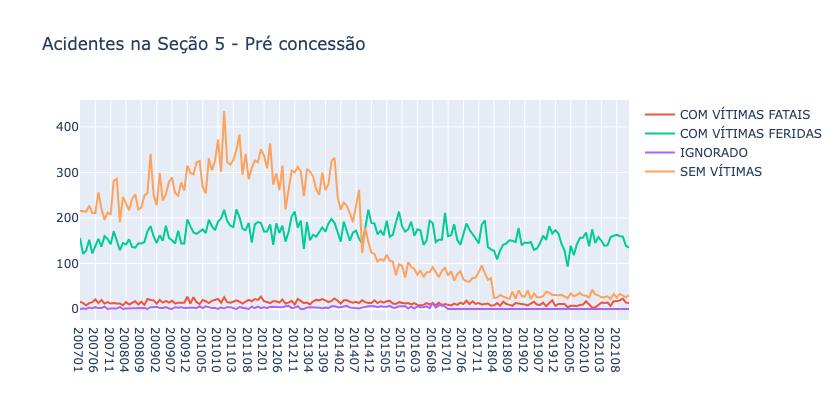

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS    IGNORADO  \
count                           180.000000           180.000000  180.000000   
mean                             14.000000           162.933333    2.222222   
std                               4.569757            22.725370    2.409375   
min                               3.000000            93.000000    0.000000   
25%                              11.000000           145.000000    0.000000   
50%                              14.000000           161.500000    2.000000   
75%                              17.000000           179.250000    4.000000   
max                              27.000000           219.000000   13.000000   

classificacao_acidente  SEM VÍTIMAS  
count                     180.00000  
mean                      169.95000  
std                       116.81056  
min                        22.00000  
25%                        55.50000  
50%                       193.50000  
75%                       275.00000  
max                       435.00000

In [24]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora) | 5 TODA A SÉRIE HISTÓRICA
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 5
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()


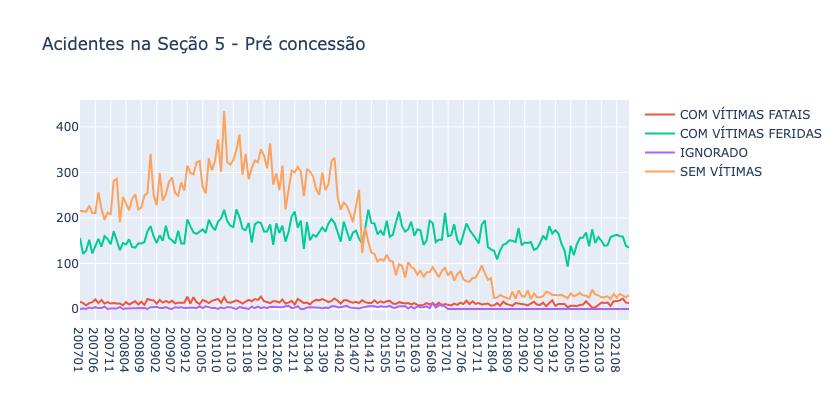

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS    IGNORADO  \
count                           180.000000           180.000000  180.000000   
mean                             14.000000           162.933333    2.222222   
std                               4.569757            22.725370    2.409375   
min                               3.000000            93.000000    0.000000   
25%                              11.000000           145.000000    0.000000   
50%                              14.000000           161.500000    2.000000   
75%                              17.000000           179.250000    4.000000   
max                              27.000000           219.000000   13.000000   

classificacao_acidente  SEM VÍTIMAS  
count                     180.00000  
mean                      169.95000  
std                       116.81056  
min                        22.00000  
25%                        55.50000  
50%                       193.50000  
75%                       275.00000  
max                       435.00000

In [25]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora) | 5 TODA A SÉRIE HISTÓRICA
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 5
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()


# ACHADO

Como houve uma grande redução da quantidade dos registros de acidentes classificados como "Sem Vítimas" a partir de 2014, este estudo vai desconsiderar os registros. Portanto, o estudo vai considerar somente os registros de acidentes classificados como "Com Vítimas Feridas" e "Com Vítimas Fatais".



##### 3.2.1.1. Acidentes na Seção 1 - Antes da Concessão


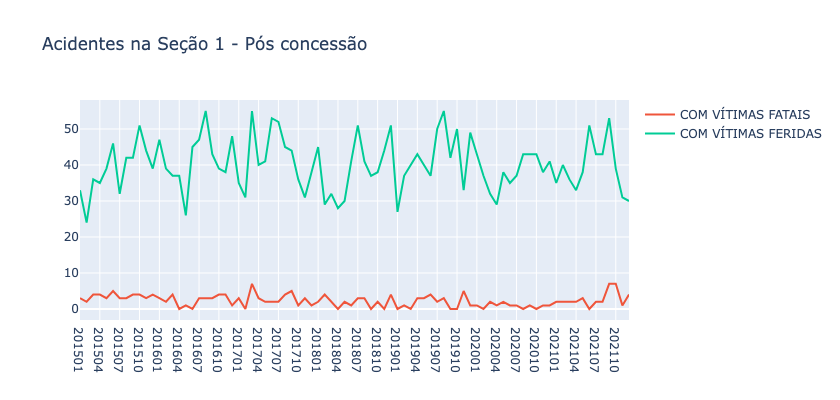

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            84.000000            84.000000
mean                              2.297619            40.071429
std                               1.684656             7.247410
min                               0.000000            24.000000
25%                               1.000000            35.750000
50%                               2.000000            39.500000
75%                               3.000000            44.000000
max                               7.000000            55.000000

In [26]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 1
pos_concessao = 1
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

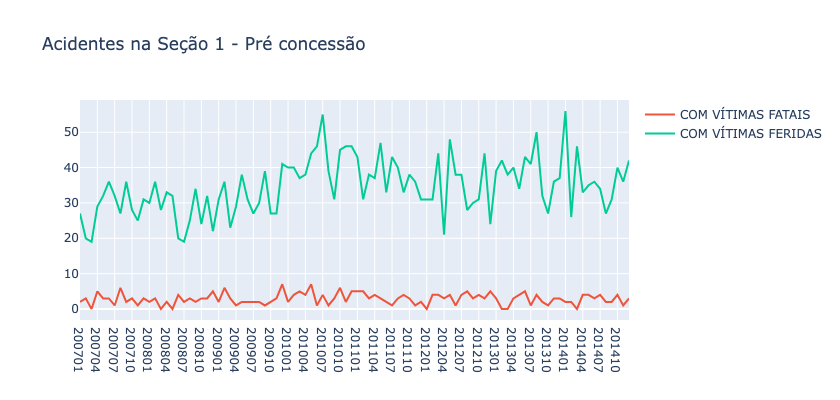

classificacao_acidente anomes_nr  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
0                         200701                 2.0                 27.0
1                         200702                 3.0                 20.0
2                         200703                 0.0                 19.0
3                         200704                 5.0                 29.0
4                         200705                 3.0                 32.0
..                           ...                 ...                  ...
91                        201408                 2.0                 27.0
92                        201409                 2.0                 31.0
93                        201410                 4.0                 40.0
94                        201411                 1.0                 36.0
95                        201412                 3.0                 42.0

[96 rows x 3 columns]

In [27]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 1
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa


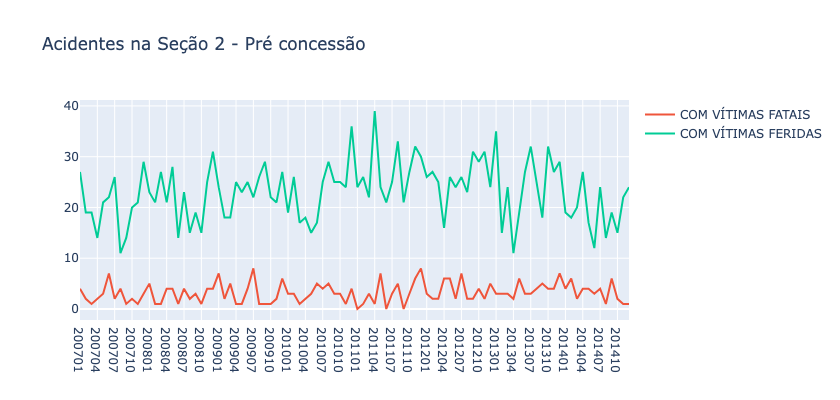

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            96.000000            96.000000
mean                              3.197917            23.104167
std                               1.933744             5.704069
min                               0.000000            11.000000
25%                               2.000000            19.000000
50%                               3.000000            24.000000
75%                               4.000000            27.000000
max                               8.000000            39.000000

In [28]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 2
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

##### 3.2.1.2. Acidentes na Seção 1 - Pós da Concessão

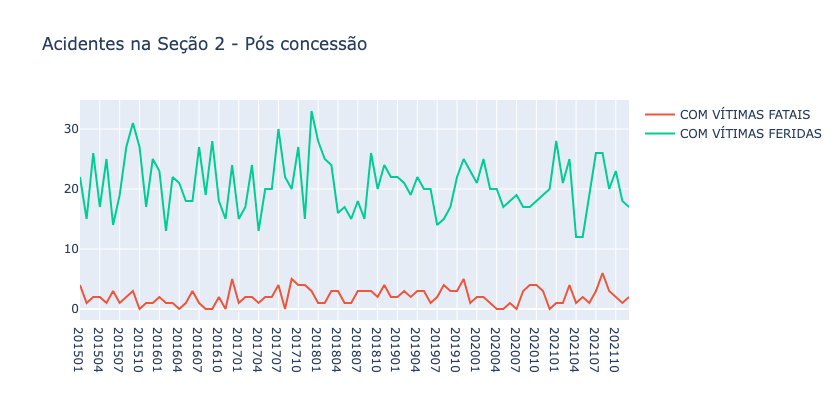

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            84.000000            84.000000
mean                              2.059524            20.654762
std                               1.391464             4.608776
min                               0.000000            12.000000
25%                               1.000000            17.000000
50%                               2.000000            20.000000
75%                               3.000000            24.000000
max                               6.000000            33.000000

In [29]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 2
pos_concessao = 1
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

In [30]:
dfa

classificacao_acidente anomes_nr  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
0                         201501                 4.0                 22.0
1                         201502                 1.0                 15.0
2                         201503                 2.0                 26.0
3                         201504                 2.0                 17.0
4                         201505                 1.0                 25.0
..                           ...                 ...                  ...
79                        202108                 6.0                 26.0
80                        202109                 3.0                 20.0
81                        202110                 2.0                 23.0
82                        202111                 1.0                 18.0
83                        202112                 2.0                 17.0

[84 rows x 3 columns]

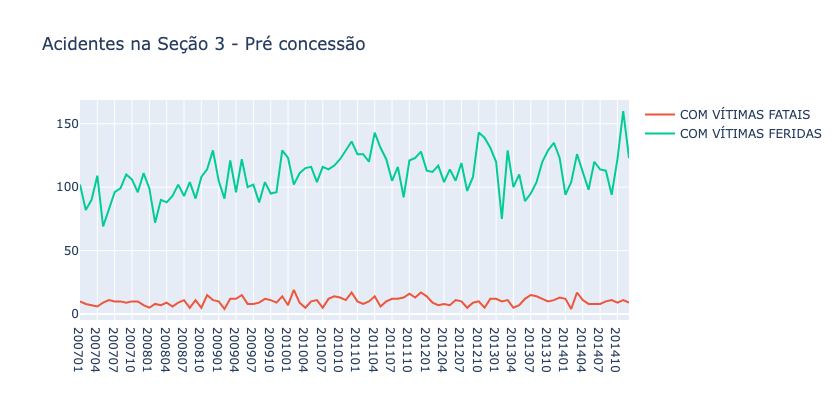

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            96.000000            96.000000
mean                             10.041667           109.927083
std                               3.148656            16.454239
min                               4.000000            69.000000
25%                               8.000000            97.750000
50%                              10.000000           110.500000
75%                              12.000000           122.000000
max                              19.000000           160.000000

In [31]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 3
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

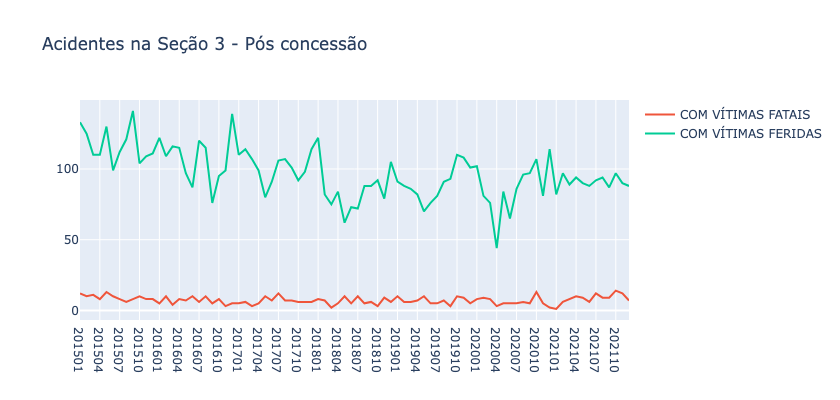

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            84.000000            84.000000
mean                              7.250000            96.833333
std                               2.767605            17.558051
min                               1.000000            44.000000
25%                               5.000000            86.000000
50%                               7.000000            95.500000
75%                               9.250000           109.250000
max                              14.000000           141.000000

In [32]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 3
pos_concessao = 1
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

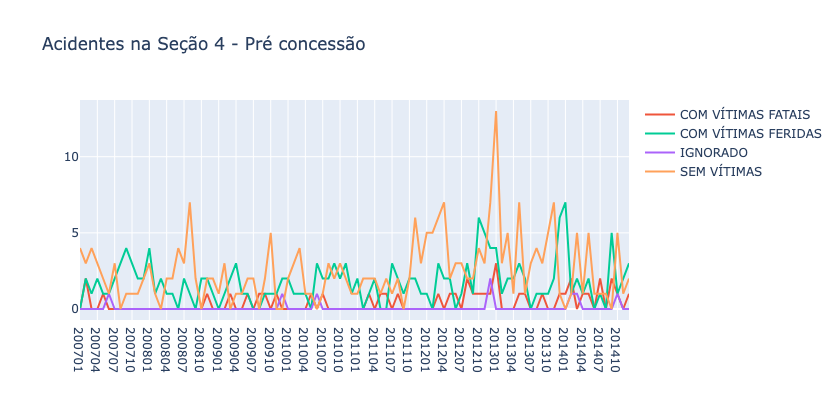

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS   IGNORADO  \
count                            96.000000            96.000000  96.000000   
mean                              0.437500             1.750000   0.083333   
std                               0.645837             1.406751   0.313442   
min                               0.000000             0.000000   0.000000   
25%                               0.000000             1.000000   0.000000   
50%                               0.000000             2.000000   0.000000   
75%                               1.000000             2.000000   0.000000   
max                               3.000000             7.000000   2.000000   

classificacao_acidente  SEM VÍTIMAS  
count                     96.000000  
mean                       2.520833  
std                        2.132353  
min                        0.000000  
25%                        1.000000  
50%                        2.000000  
75%                        3.000000  
max                       13.000000

In [33]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora) | 4 (somente trecho duplicado - toda a série histórica de acidentes com vítimas)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 4
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

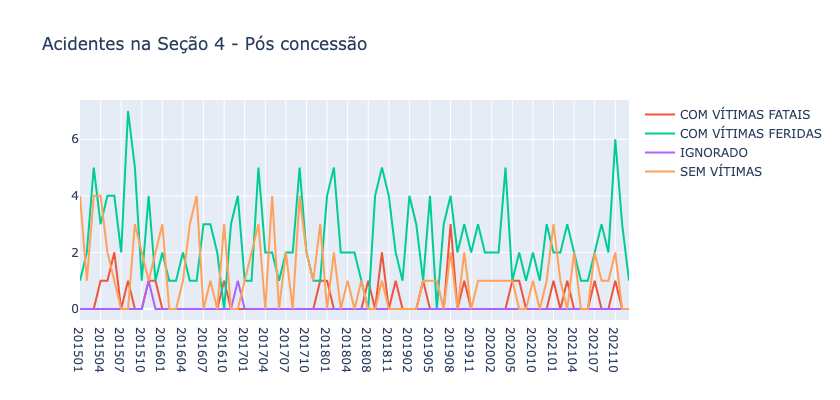

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS   IGNORADO  \
count                            81.000000            81.000000  81.000000   
mean                              0.308642             2.432099   0.024691   
std                               0.583994             1.474265   0.156150   
min                               0.000000             0.000000   0.000000   
25%                               0.000000             1.000000   0.000000   
50%                               0.000000             2.000000   0.000000   
75%                               1.000000             3.000000   0.000000   
max                               3.000000             7.000000   1.000000   

classificacao_acidente  SEM VÍTIMAS  
count                     81.000000  
mean                       1.148148  
std                        1.246105  
min                        0.000000  
25%                        0.000000  
50%                        1.000000  
75%                        2.000000  
max                        4.000000

In [34]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora) | 4 (somente trecho duplicado - toda a série histórica de acidentes com vítimas)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 4
pos_concessao = 1
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()


In [35]:
#dfa = dftc[(dftc['trecho_duplicado']==1)&(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))]
dfa = dftc[(dftc['trecho_duplicado']==1)&(dftc['pos_concessao']==1)].groupby(["anomes_nr"]).agg({'id':'count'})

figura = px.line(title = "teste", width=1100, height=400)
for i in dfa.columns[1:]:   
    print(i)
    #figura.add_scatter(x = dfa["anomes_nr"] ,y = dfa[i], name = i)
    #figura.add_scatter(x = table["anomes_nr"] ,y = table[i], name = i)
#figura.show()
    
#dfa

In [36]:
dfa.columns[1:]

Index([], dtype='object')

In [37]:
dfa.count()

id    81
dtype: int64

# ACIDENTES - SHAP - Scikit-Learn
# ACIDENTES - SHAP - XGBOOST

a partir do exemplo 
https://www.rasgoml.com/feature-engineering-tutorials/scikit-learn-gradient-boosted-tree-feature-selection-with-shapley-importance

In [38]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
import shap
import category_encoders as ce

import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier as rfc

%matplotlib inline

# load JS visualization code to notebook
shap.initjs()


In [39]:
def _prepare_data(dfacid, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Prepara o DataFrame 
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    # Filtro no DataFrame para seção e concessão
    df = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&(dfacid['classificacao_acidente']!='SEM VÍTIMAS')] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    
    # target para acidentes com Vítimas graves e fatais = 1, e Vítimas leves = 0
    df.dropna(inplace=True)

    # map para a classificação de assidentes - nosso target
    df['classificacao_acidente'] = df['classificacao_acidente'].map({'COM VÍTIMAS FERIDAS':0,'COM VÍTIMAS FATAIS':1,'IGNORADO':2, 'SEM VÍTIMAS':3})

    # Drop nas colunas que não serão usadas na análise
    df = df.drop(columns=[ 'id',
                           'data_inversa',
                           'br',
                           'latitude',                
                           'longitude',
                           'kmint',
                           'ano',
                           'ano_mes', 
                           'minuto'])
    
     
    # Definição do X e y para o ML
    X = df.drop(['classificacao_acidente'], axis=1)
    y = df['classificacao_acidente']
    
    # Split para o modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X, y


def _exec_shap(X, y, tipo):
    shap.initjs()
    
    # Separa o campo target - objetivo a ser predito
    target = 'target'
    # Separa o Target

    # Split para o modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    
    # Encoder para colunas categóricas
    encoder = ce.LeaveOneOutEncoder(return_df=True)
    X_train_loo = encoder.fit_transform(X_train, y_train)
    X_test_loo = encoder.transform(X_test)
    
    if tipo == 'RFC':    
        model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
        model.fit(X_train_loo, y_train)
                
        # Classification report
        p = model.predict(X_test_loo)
        print(classification_report(y_test, p))
        
        # para imprimir Shapley
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_loo)
       # shap_importance = shap_values.abs.mean(0).values
       # importance_df = pd.DataFrame({'features': X_train_loo.columns,
       #                               'importance': shap_importance})
       # importance_df.sort_values(by='importance', ascending=False, inplace=True)

        #shap.summary_plot(shap_values[0], X_test_loo, plot_type='dots') 
        
        shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test_loo.iloc[0,:])
        #shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_loo.iloc[0,:])
        shap.dependence_plot(8, shap_values[0], X_test_loo)
        shap.plots.waterfall(shap_values[0], y_test, X_test_loo[0])
        rmse = 0
        importance_df = 0
   
    elif tipo == 'XGB':
        
        
        # train XGBoost model
        model = xgboost.XGBClassifier().fit(X_train_loo, y_train)

        #print('Best Error: {.2f} with {} rounds'.format(model.best_score, model.best_interaction+1))
        
        
        # compute SHAP values
        explainer = shap.Explainer(model, X_train_loo)
        shap_values = explainer(X_train_loo)
        
        shap_importance = shap_values.abs.mean(0).values
        importance_df = pd.DataFrame({'features': X_train_loo.columns,
                                      'importance': shap_importance})
        importance_df.sort_values(by='importance', ascending=False, inplace=True)
      
        shap.plots.waterfall(shap_values[0])
        rmse = 0
        importance_df = 0
        
        #print(importance_df)
        
        shap.dependence_plot("tipo_pista", shap_values, y_train, interaction_index="tipo_pista")
    
    return rmse, importance_df


In [40]:
# importe do cross_val_score
from sklearn.model_selection import cross_val_score

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Prepara o DataFrame 
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Filtro no DataFrame para seção e concessão
#df = dftc[(dftc['secao']==1)&(dftc['pos_concessao']==1)&(dftc['classificacao_acidente']!='SEM VÍTIMAS')] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
df = dftc[(dftc['pos_concessao']==1)&(dftc['trecho_duplicado']==1)&(dftc['classificacao_acidente']!='SEM VÍTIMAS')] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
# total
#df = dftc[(dftc['classificacao_acidente']!='SEM VÍTIMAS')] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

# Target - Acidentes Graves (mortos ou feridos graves)
#df['acidente_grave'] = df['acidente_grave'].map({'COM VÍTIMAS FERIDAS':0,'COM VÍTIMAS FATAIS':1,'IGNORADO':2, 'SEM VÍTIMAS':3})
df['acidente_grave'] = 0
df.loc[df['mortos'] > 0, 'acidente_grave'] = 1
df.loc[df['feridos_graves'] > 0, 'acidente_grave'] = 1

# target para acidentes com Vítimas graves e fatais = 1, e Vítimas leves = 0
df.dropna(inplace=True)

# map para o tipo de pista - nosso target
#df['tipo_pista'] = df['tipo_pista'].map({'DUPLA':1,'MÚLTIPLA':1,'SIMPLES':0, '(NULL)':0})

# Drop nas colunas que não serão usadas na análise
df = df.drop(columns=[ 'id',
                       'data_inversa',
                       'br',
                       'latitude',                
                       'longitude',
                       'kmint',
                       'ano',
                       'ano_mes', 
                       'anomes_nr',
                       'km',
                       'hora',
                       'mes',
                       'municipio',
                       'uso_solo',
                       'target',
                       'secao',
                       'pos_concessao',
                       'minuto',
                       'ilesos',
                       'feridos_leves',
                       'feridos_graves',
                       'classificacao_acidente',
                       'mortos'])
             
#df['anomes_nr'] = df['anomes_nr'].astype('int')


df = pd.get_dummies(df)

# Filtro para pegar por tipo de acidente
#df = df[(df['acidente_grave']==1)&(df['tipo_acidente_ATROPELAMENTO DE PESSOA']>=1)] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

# Definição do X e y para o ML
X = df.drop(['acidente_grave'], axis=1)
y = df['acidente_grave']
print(df['acidente_grave'].unique())
#df.info()


# Split para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[0 1]
(156, 85) (68, 85) (156,) (68,)


In [41]:
df

trecho_duplicado  acidente_grave  dia_semana_DOMINGO  \
1227                  1               0                   0   
1232                  1               1                   0   
1233                  1               0                   1   
1236                  1               1                   0   
1238                  1               0                   0   
...                 ...             ...                 ...   
57665                 1               1                   0   
57723                 1               1                   0   
57736                 1               1                   0   
57748                 1               1                   0   
57792                 1               1                   0   

       dia_semana_QUARTA-FEIRA  dia_semana_QUINTA-FEIRA  \
1227                         0                        0   
1232                         0                        0   
1233                         0                        0   
1236                         0                        0   
1238                         0                        0   
...                        ...                      ...   
57665                        0                        0   
57723                        0                        0   
57736                        0                        0   
57748                        0                        0   
57792                        0                        0   

       dia_semana_SEGUNDA-FEIRA  dia_semana_SEXTA-FEIRA  dia_semana_SÁBADO  \
1227                          1                       0                  0   
1232                          0                       0                  0   
1233                          0                       0                  0   
1236                          0                       1                  0   
1238                          0                       0                  0   
...                         ...                     ...                ...   
57665                         0                       0                  1   
57723                         0                       1                  0   
57736                         0                       1                  0   
57748                         0                       0                  1   
57792                         0                       0                  0   

       dia_semana_TERÇA-FEIRA  uf_GO  ...  condicao_metereologica_SOL  \
1227                        0      1  ...                           0   
1232                        1      1  ...                           0   
1233                        0      1  ...                           0   
1236                        0      1  ...                           0   
1238                        1      1  ...                           0   
...                       ...    ...  ...                         ...   
57665                       0      1  ...                           0   
57723                       0      1  ...                           1   
57736                       0      1  ...                           0   
57748                       0      1  ...                           0   
57792                       1      1  ...                           0   

       condicao_metereologica_VENTO  tipo_pista_DUPLA  tipo_pista_MÚLTIPLA  \
1227                              0                 0                    0   
1232                              0                 0                    0   
1233                              0                 1                    0   
1236                              0                 0                    0   
1238                              0                 0                    0   
...                             ...               ...                  ...   
57665                             0                 1                    0   
57723                             0                 1                    0   
57736                    

In [42]:
X_train

trecho_duplicado  dia_semana_DOMINGO  dia_semana_QUARTA-FEIRA  \
3156                  1                   0                        1   
2313                  1                   0                        0   
3221                  1                   0                        0   
2364                  1                   0                        0   
1527                  1                   0                        0   
...                 ...                 ...                      ...   
2552                  1                   0                        0   
1273                  1                   1                        0   
2167                  1                   0                        0   
53472                 1                   0                        0   
2293                  1                   1                        0   

       dia_semana_QUINTA-FEIRA  dia_semana_SEGUNDA-FEIRA  \
3156                         0                         0   
2313                         1                         0   
3221                         0                         1   
2364                         0                         0   
1527                         0                         0   
...                        ...                       ...   
2552                         0                         0   
1273                         0                         0   
2167                         0                         0   
53472                        0                         0   
2293                         0                         0   

       dia_semana_SEXTA-FEIRA  dia_semana_SÁBADO  dia_semana_TERÇA-FEIRA  \
3156                        0                  0                       0   
2313                        0                  0                       0   
3221                        0                  0                       0   
2364                        0                  1                       0   
1527                        0                  1                       0   
...                       ...                ...                     ...   
2552                        0                  1                       0   
1273                        0                  0                       0   
2167                        0                  0                       1   
53472                       0                  1                       0   
2293                        0                  0                       0   

       uf_GO  uf_MG  ...  condicao_metereologica_SOL  \
3156       1      0  ...                           0   
2313       1      0  ...                           0   
3221       1      0  ...                           0   
2364       1      0  ...                           0   
1527       1      0  ...                           0   
...      ...    ...  ...                         ...   
2552       1      0  ...                           0   
1273       1      0  ...                           0   
2167       1      0  ...                           0   
53472      1      0  ...                           0   
2293       1      0  ...                           0   

       condicao_metereologica_VENTO  tipo_pista_DUPLA  tipo_pista_MÚLTIPLA  \
3156                              0                 1                    0   
2313                              0                 1                    0   
3221                              0                 1                    0   
2364                              0                 1                    0   
1527                              0                 1                    0   
...                             ...               ...                  ...   
2552                              0                 1                    0   
1273                              0                 1                    0   
2167                              0                 1                    0   
53472                             0                 1  

In [43]:
# train XGBoost model
classificador_xgb = xgb.XGBClassifier()
resultado_cv = cross_val_score(classificador_xgb, X_train, y_train)

resultado_cv

array([0.6875    , 0.64516129, 0.5483871 , 0.74193548, 0.61290323])

In [44]:
100 * cross_val_score(classificador_xgb, X_train, y_train).mean()

64.71774193548387

In [45]:
#classificador_campeao.fit(X_train, y_train)

In [46]:
classificador_xgb_tunado = xgb.XGBClassifier(max_depth=6)
100 * cross_val_score(classificador_xgb_tunado, X_train, y_train).mean()

64.71774193548387

In [47]:
classificador_xgb_dart = xgb.XGBClassifier(booster='dart')
100 * cross_val_score(classificador_xgb_dart, X_train, y_train).mean()

64.71774193548387

In [48]:
classificador_xgb_linear = xgb.XGBClassifier(booster='gblinear')
100 * cross_val_score(classificador_xgb_linear, X_train, y_train).mean()

67.2782258064516

In [49]:
#classificador_campeao = classificador_xgb_tunado
classificador_campeao = classificador_xgb_tunado

In [50]:
classificador_campeao.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
#print(classificador_campeao)

In [52]:
y_pred_train_proba = classificador_campeao.predict_proba(X_train)
print('Probabilidade do modelo prever como acidente não grave = ',(100*y_pred_train_proba[3][0]).round(2),'%.')
print('Probabilidade do modelo prever como acidente grave = ',(100*y_pred_train_proba[3][1]).round(2),'%.')



Probabilidade do modelo prever como acidente não grave =  98.79 %.
Probabilidade do modelo prever como acidente grave =  1.21 %.


In [53]:
predict = classificador_campeao.predict(X_test)

In [54]:
predict[:44]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [55]:
len(predict) , len(y_test)

(68, 68)

In [56]:
(predict == y_test).sum()

43

In [57]:
acuracia_teste = 100* (predict == y_test).sum() / len(y_test)
print('No teste, o modelo acertou {:.2f}% das previsões na base de teste.'.format(acuracia_teste))

No teste, o modelo acertou 63.24% das previsões na base de teste.


In [58]:
model = xgb.XGBClassifier().fit(X_train, y_train)

In [59]:
'''
    * "weight" is the number of times a feature appears in a tree
    * "gain" is the average gain of splits which use the feature
    * "cover" is the average coverage of splits which use the feature
      where coverage is defined as the number of samples affected by the split
'''

'\n    * "weight" is the number of times a feature appears in a tree\n    * "gain" is the average gain of splits which use the feature\n    * "cover" is the average coverage of splits which use the feature\n      where coverage is defined as the number of samples affected by the split\n'

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

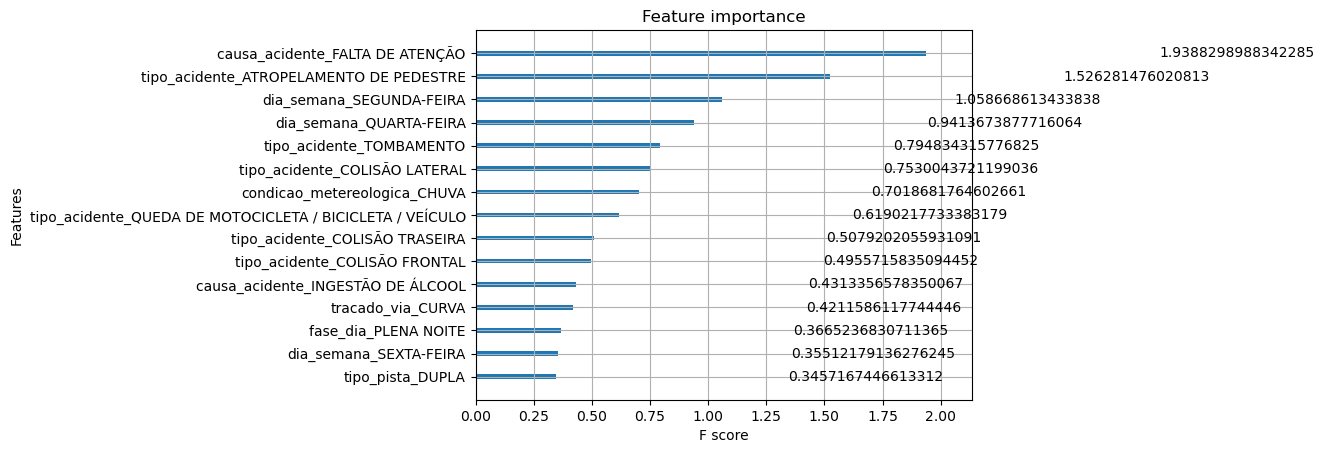

In [60]:
xgb.plot_importance(classificador_campeao, max_num_features=15, importance_type="gain")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

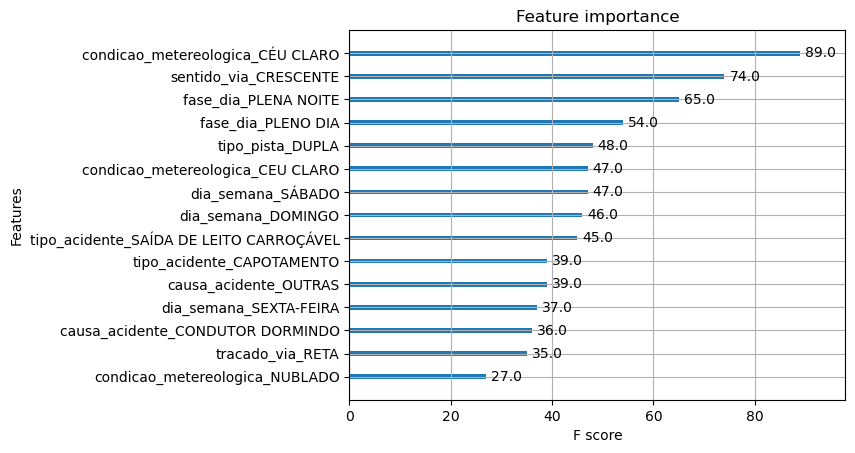

In [61]:
xgb.plot_importance(classificador_campeao, max_num_features=15)

In [62]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model=classificador_campeao)
shap_values = explainer.shap_values(X_train, y_train)

In [63]:
expected_value = explainer.expected_value
print(expected_value)

# Apresentar em tela
#print('Valor de base para classe negativa -',100*expected_value[0].round(2))
#print('Valor de base para classe positiva -',100*expected_value[1].round(2))

# Somatório dos valores SHAP para classe positiva
#print('Somatório SHAP para classe negativa nesta amostra:',100*y_pred_train_proba[3][0].round(2)-100*expected_value[0].round(2))
#print('Somatório SHAP para classe positiva nesta amostra:',100*y_pred_train_proba[3][1].round(2)-100*expected_value[1].round(2)) 


-1.018031


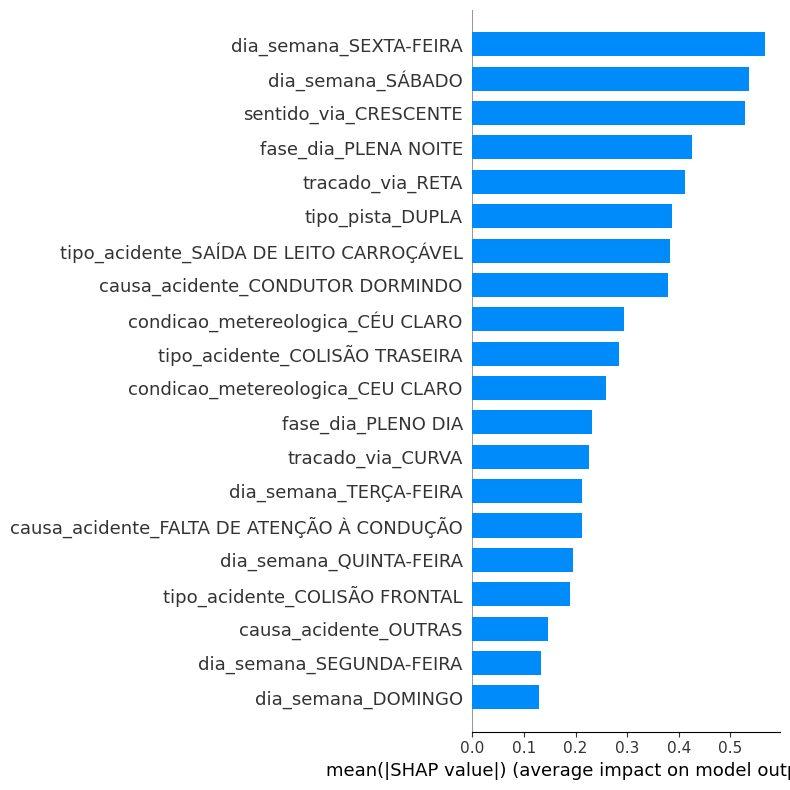

In [64]:
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(8,8));

In [65]:
# force plot para previsão de negativo - Sem gravidade - pegou-se o primeiro caso
#shap.force_plot(explainer.expected_value, shap_values[43,:], X.iloc[43,:])

In [66]:
#array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [67]:
# force plot para previsão de negativo - Acidente Grave
#shap.force_plot(explainer.expected_value, shap_values[2,:], X.iloc[2,:])

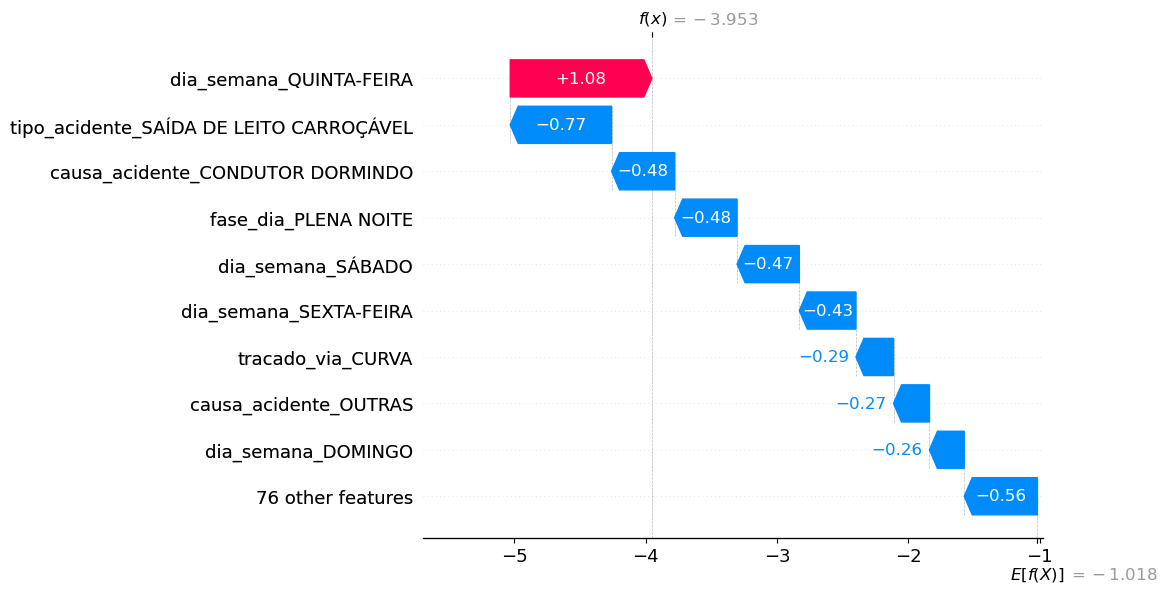

In [68]:
shap.plots._waterfall.waterfall_legacy(expected_value=explainer.expected_value, shap_values=shap_values[43,:], feature_names=X_train.columns, show=True)


In [69]:
#shap.decision_plot(base_value=expected_value, shap_values=shap_values[43,:], features=X_train.columns,highlight=0)

In [70]:
#shap.summary_plot(shap_values[1][3], X)

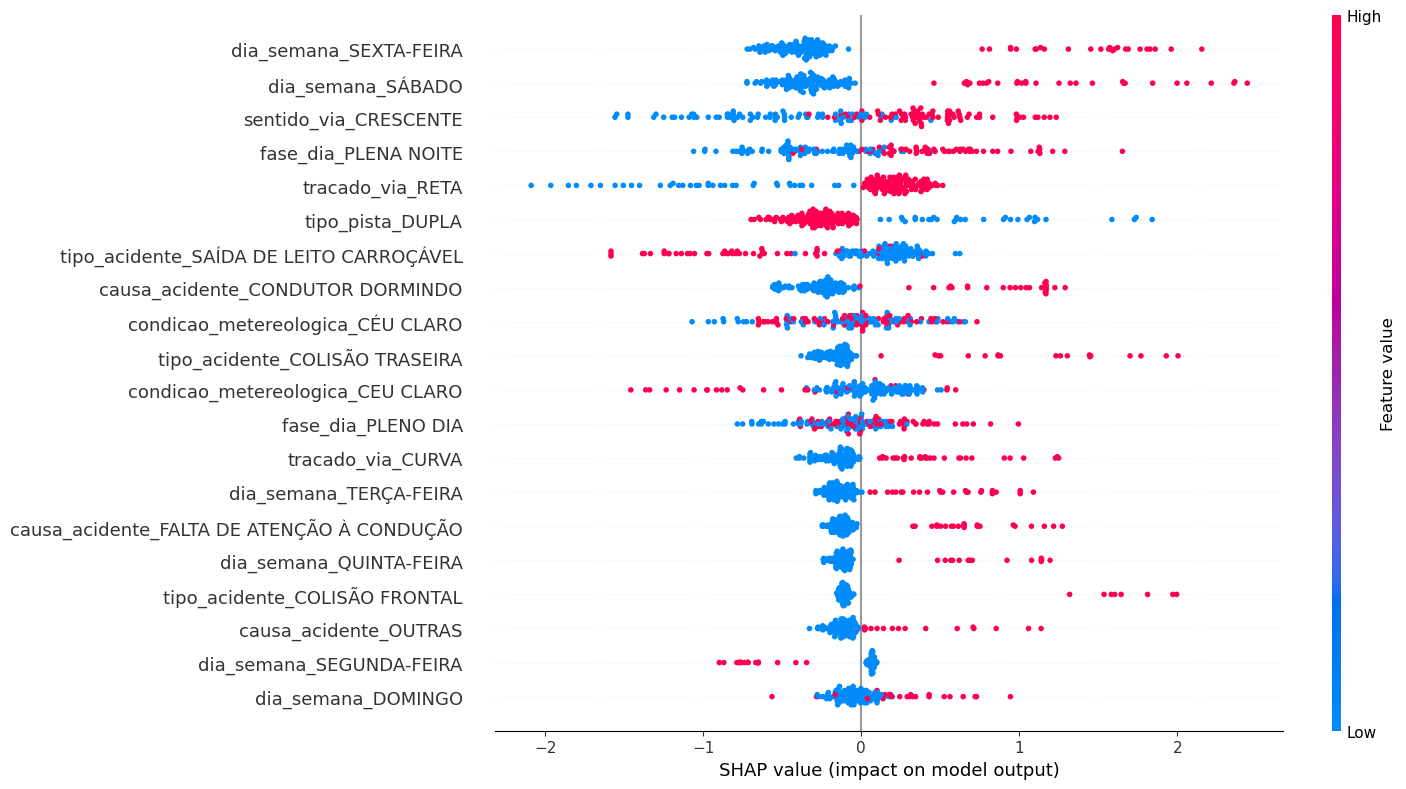

In [71]:

shap.summary_plot(shap_values, X_train, plot_type="dot", plot_size=(15,8))


In [72]:
# compute SHAP values
background_adult = shap.maskers.Independent(X_train, max_samples=100)
#explainer = shap.Explainer(classificador_campeao, background_adult)
explainer = shap.Explainer(classificador_campeao, background_adult)

shap_values = explainer(X_train)
#shap.plots.bar(shap_values)
#shap.plots.bar(shap_values.abs.max(0))

In [73]:

shap_importance = shap_values.abs.mean(0).values
#importance_df = pd.DataFrame({'features': X_train.columns,
#                              'importance': shap_importance})
#importance_df.sort_values(by='importance', ascending=False, inplace=True)
shap_importance

array([0.        , 0.16519363, 0.04688935, 0.19057282, 0.14021617,
       0.51038006, 0.5685942 , 0.25679897, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.35256073, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06942739, 0.        , 0.        , 0.04286639,
       0.        , 0.24898208, 0.        , 0.        , 0.        ,
       0.02391653, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14227102, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1022098 ,
       0.        , 0.11845189, 0.        , 0.        , 0.        ,
       0.        , 0.21262469, 0.03535024, 0.        , 0.28905819,
       0.        , 0.06301751, 0.        , 0.47415946, 0.        ,
       0.03297529, 0.03437945, 0.        , 0.4705239 , 0.22377459,
       0.61110132, 0.        , 0.26332012, 0.12583989, 0.29944514,
       0.        , 0.        , 0.        , 0.        , 0.11126

In [74]:
#shap.plots.waterfall(shap_values[0])
#shap.waterfall_plot(explainer.base_values[0], values[0], X[0])
#shap.waterfall_plot(explainer.base_values[0], values[0][0][0], X[0])

In [75]:
explainer.bas_values[0]

AttributeError: 'Tree' object has no attribute 'bas_values'

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 1
pos_concessao = 0
X, y = _prepare_data(dftc, secao, pos_concessao)

ff





In [ ]:
y.shape

In [ ]:

#rmse, importance_df = _exec_shap(X, y, 'RFC')
rmse, importance_df = _exec_shap(X, y,'XGB')

print('Shap dos Acidentes da Seção 1 do trecho, do período pré concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 1
pos_concessao = 0
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
#rmse, importance_df = _exec_shap(xx, 'XGB')

print('Shap dos Acidentes da Seção 1 do trecho, do período pré concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 1
pos_concessao = 1
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 1 do trecho, do período pós concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2


In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 2
pos_concessao = 0
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 2 do trecho, do período pré concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 2
pos_concessao = 1
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 2 do trecho, do período pós concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 3
pos_concessao = 0
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 3 do trecho, do período pré concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 3
pos_concessao = 1
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 3 do trecho, do período pós concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

## 4.1 - Estatísticas

### 4.1.1. 

In [ ]:
def _get_veiculos_acid(dfvei, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Quantitativo de acidentes por classificação de acidente
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    dfv = dfvei[(dfvei['secao']==secao)&(dfvei['pos_concessao']==pos_concessao)&((dfvei['classificacao_acidente']!='SEM VÍTIMAS') & (dfvei['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

    #dfv = dfvei[(dfvei['secao']==secao)&(dfvei['pos_concessao']==pos_concessao)].groupby(['ano','tipo_veiculo']).agg({'id_veiculo':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    #dfa = dfacid.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    dfv = pd.pivot_table(dfv, values='id_veiculo', index=['anomes_nr'],
                         columns=['tipo_veiculo'], aggfunc=np.sum)
    #dfa.reset_index(inplace=True)
    dfv.reset_index(inplace=True)
    dfv.fillna(0)
    return dfv


def _plot_line_graf(dfa, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Quantitativo de acidentes por classificação de acidente
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    if pos_concessao == 0:
        tit = 'Pré concessão'
    else:
        tit = 'Pós concessão'
    
    titulo = f'Acidentes na Seção {secao} - {tit}'
    
    figura = px.line(title = titulo, width=1100, height=400)
    for i in dfa.columns[1:]:
        figura.add_scatter(x = dfa["anomes_nr"] ,y = dfa[i], name = i)
        #figura.add_scatter(x = table["anomes_nr"] ,y = table[i], name = i)
    figura.show()
    return dfa

# VEICULOS - SHAP - Scikit-Learn


In [ ]:
def _executa_shap_veiculos(dfacid, secao, pos_concessao):
    df = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&(dfacid['classificacao_acidente']!='SEM VÍTIMAS')] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    df['target'] = False
    df.loc[df['mortos'] > 0, 'target'] = True
    df.loc[df['feridos_graves'] > 0, 'target'] = True
    df.dropna(inplace=True)
    target = 'target'
    y = df[target]
    X = df.drop(columns=[target, 
                         'id', 
                         'data_inversa', 
                         'br', 
                         'kmint', 
                         'classificacao_acidente', 
                         'sentido_via', 
                         'uso_solo', 
                         'ano_mes', 
                         'anomes_nr', 
                         'mortos',
                         'feridos_leves',
                         'feridos_graves', 
                         'ilesos', 
                         'secao', 
                         'pos_concessao', 
                         'uf', 
                         'minuto',
                         'ano'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1066)
    encoder = ce.LeaveOneOutEncoder(return_df=True)
    X_train_loo = encoder.fit_transform(X_train, y_train)
    X_test_loo = encoder.transform(X_test)
    model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
    model.fit(X_train_loo, y_train)
    rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_loo)))
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test_loo)
    shap_importance = shap_values.abs.mean(0).values
    importance_df = pd.DataFrame({'features': X_train_loo.columns,
                                  'importance': shap_importance})
    importance_df.sort_values(by='importance', ascending=False, inplace=True)

    return rmse, importance_df


In [ ]:
# Deletar nulos
df.dropna(inplace=True)

In [ ]:
df

In [ ]:
target = 'target'
y = df[target]
X = df.drop(columns=[target, 'id', 'data_inversa', 'br', 'kmint', 'classificacao_acidente', 
                     'sentido_via', 'uso_solo', 'ano_mes', 'anomes_nr', 'mortos',
                    'feridos_leves','feridos_graves', 'ilesos', 'secao', 'pos_concessao', 'uf', 'minuto','ano'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1066)


In [ ]:
X

In [ ]:

encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)


In [ ]:

model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
model.fit(X_train_loo, y_train)

rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_loo)))
rmse


In [ ]:

explainer = shap.Explainer(model)
shap_values = explainer(X_test_loo)
shap_importance = shap_values.abs.mean(0).values
importance_df = pd.DataFrame({'features': X_train_loo.columns,
                              'importance': shap_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df


In [ ]:

feature_list = importance_df[importance_df.importance > 0.15]['features'].tolist()
feature_list


In [ ]:
feature_list = importance_df['features'].head(5).tolist()
feature_list

In [ ]:

X_train_loo_new = X_train_loo[feature_list]
X_test_loo_new = X_test_loo[feature_list]


In [ ]:

reduced_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
reduced_model.fit(X_train_loo_new, y_train)

rmse = np.sqrt(mean_squared_error(y_test, reduced_model.predict(X_test_loo_new)))
rmse


## SHapley

https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html

In [ ]:
def _sep_dataset(df, target):
    target=df.loc[:,[target]]
    #target.to_numpy()
    dfsource = df.drop(columns=target)
    return dfsource, target
    
#X.dropna(subset=['latitude', 'longitude'], inplace=True)

#del df2shap

In [ ]:
aggr_fld = ['tracado_via']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['uso_solo']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['classificacao_acidente']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['fase_dia']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['tipo_pista']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

SUGESTÕES DE PERGUNTAS:
- Relação de causa do acidente x tipo do acidente x horario do acidente x condição meteorologica x tipo de pista x traçado da via x uso do solo x dia da semana com a mortalidade dos acidentes?
- Relação de tipos de veículos x mortalidade dos acidentes?
- Escolher um trecho de rodovia concedida para analisar. Exemplo: BR-040 DF até Juiz de Fora; 

#### Domínios do acidente

Exemplo   | Valor do exemplo
--------- | ------
causa_acidente | Reação tardia ou ineficiente do condutor ,Velocidade Incompatível ,Demais falhas mecânicas ou elétricas ,Entrada inopinada do pedestre ,Condutor Dormindo ,Frear bruscamente ,Acessar a via sem observar a presença dos outros veículos ,Chuva ,Ausência de reação do condutor ,Pedestre andava na pista ,Problema com o freio ,Carga excessiva e/ou mal acondicionada ,Ingestão de álcool pelo condutor ,Acostamento em desnível ,Ultrapassagem Indevida ,Mal súbito do condutor ,Curva acentuada ,Avarias e/ou desgaste excessivo no pneu ,Acumulo de água sobre o pavimento ,Condutor deixou de manter distância do veículo da frente ,Pedestre cruzava a pista fora da faixa ,Falta de elemento de contenção que evite a saída do leito carroçável ,Manobra de mudança de faixa ,Demais falhas na via ,Condutor usando celular ,Pista Escorregadia ,Ingestão de álcool ou de substâncias psicoativas pelo pedestre ,Obstrução na via ,Ingestão de álcool e/ou substâncias psicoativas pelo pedestre ,Acumulo de óleo sobre o pavimento ,Ingestão de substâncias psicoativas pelo condutor ,Transitar na contramão ,Iluminação deficiente ,Pista esburacada ,Conversão proibida ,Afundamento ou ondulação no pavimento ,Animais na Pista ,Demais Fenômenos da natureza ,Transitar no acostamento ,Desrespeitar a preferência no cruzamento ,Falta de acostamento ,Objeto estático sobre o leito carroçável ,Pista em desnível ,Estacionar ou parar em local proibido ,Área urbana sem a presença de local apropriado para a travessia de pedestres ,Desvio temporário ,Declive acentuado ,Obras na pista ,Ausência de sinalização ,Acumulo de areia ou detritos sobre o pavimento ,Problema na suspensão ,Acesso irregular ,Retorno proibido ,Sinalização mal posicionada ,Deficiência do Sistema de Iluminação/Sinalização ,Faixas de trânsito com largura insuficiente ,Restrição de visibilidade em curvas horizontais ,Neblina ,Fumaça ,Faróis desregulados ,Sistema de drenagem ineficiente ,Restrição de visibilidade em curvas verticais ,Condutor desrespeitou a iluminação vermelha do semáforo ,Trafegar com motocicleta (ou similar) entre as faixas ,Redutor de velocidade em desacordo ,Deixar de acionar o farol da motocicleta (ou similar) ,Transitar na calçada ,Semáforo com defeito ,Participar de racha ,Sinalização encoberta ,Modificação proibida
tipo_acidente | Tombamento ,Incêndio ,Atropelamento de Pedestre ,Saída de leito carroçável ,Capotamento ,Colisão com objeto ,Colisão traseira ,Derramamento de carga ,Colisão lateral ,Eventos atípicos ,Colisão frontal ,Colisão lateral sentido oposto ,Colisão lateral mesmo sentido ,Atropelamento de Animal ,Colisão transversal ,Engavetamento ,Queda de ocupante de veículo
classificacao_acidente | Com Vítimas Feridas, Sem Vítimas, Com Vítimas Fatais
fase_dia | Amanhecer, Pleno dia, Plena Noite, Anoitecer
sentido_via | Crescente, Decrescente, Não Informado
condicao_metereologica | Nublado, Céu Claro, Chuva, Ignorado, Sol, Garoa/Chuvisco, Nevoeiro/Neblina, Vento, Neve, Granizo
tipo_pista | Dupla, Simples, Múltipla
tracado_via | Curva, Reta, Não Informado, Desvio Temporário, Retorno Regulamentado, Ponte, Interseção de vias, Rotatória, Túnel, Viaduto
uso_solo | Não, Sim




## Dados abertos antt

https://dados.antt.gov.br/dataset/trecho-concedido/resource/2de5d294-13fc-4ff1-aa6d-60306e3eb492

concessionaria;ano_do_pnv_snv;tipo_de_rodovia;rodovia;uf;km_m_inicial;km_m_final;direcao;sentido

VIA 040;2010;Federal;BR-40;DF;0,000;8,400;Sul;Crescente

VIA 040;2010;Federal;BR-40;DF;8,400;0,000;Norte;Decrescente

VIA 040;2010;Federal;BR-40;GO;0,000;157,300;Sul;Crescente

VIA 040;2010;Federal;BR-40;GO;157,300;0,000;Norte;Decrescente

VIA 040;2010;Federal;BR-40;MG;0,000;773,500;Sul;Crescente

VIA 040;2010;Federal;BR-40;MG;773,500;0,000;Norte;Decrescente


In [ ]:
aggr_fld = ['causa_acidente']

df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['tipo_acidente']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Quantitativo pessoas envolvidas por classificação de acidente - Pós-cencessão
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

figura = px.line(title = 'Histórico de vitimas acidentes - Pré concessão', width=1100, height=400)
for i in dfa1pre.columns[1:]:
    figura.add_scatter(x = dfa1pre["anomes_nr"] ,y = dfa1pre[i], name = i)
figura.show()

In [ ]:
# plotar o gráfico
figura = px.line(title = 'Histórico de vitimas acidentes - Pós concessão', width=1100, height=400)
for i in dfa1pos.columns[1:]:
    figura.add_scatter(x = dfa1pos["anomes_nr"] ,y = dfa1pos[i], name = i)
figura.show()

### Estatística Descritiva dos dados de Acidentes

In [ ]:
# imprimir os dados para verificação visual
dfacid

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Quantitativo pessoas envolvidas por classificação de acidente - Pós-cencessão
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

figura = px.line(title = 'Histórico de acidentes - Pré concessão', width=1100, height=400)
for i in dfapre.columns[1:]:
    figura.add_scatter(x = dfapre["anomes_nr"] ,y = dfapre[i], name = i)
figura.show()

In [ ]:
# plotar o gráfico
figura = px.line(title = 'Histórico de acidentes - Pós concessão', width=1100, height=400)
for i in dfapos.columns[1:]:
    figura.add_scatter(x = dfapos["anomes_nr"] ,y = dfapos[i], name = i)
figura.show()

In [ ]:
# separar Dataframe pré e pós concessão - qtd_acidentes
dfapre = dfa_toda_serie.query("anomes_nr < '201407'")
dfapos = dfa_toda_serie.query("anomes_nr >= '201407'")
# separar Dataframe pré e pós concessão - qtd_vitimas
dfa1pre = dfa1.query("anomes_nr < '201407'")
dfa1pos = dfa1.query("anomes_nr >= '201407'")


In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Quantitativo de acidentes por vítimas
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#figura = px.line(title = 'Histórico de acidentes - Vítimas', width=1100, height=400)
figura = px.bar(title = 'Histórico de acidentes - Vítimas', width=1100, height=400)

for i in dfa_toda_serie.columns[1:]:
    figura.add_scatter(x = dfa_toda_serie["anomes_nr"] ,y = dfa_toda_serie[i], name = i)
figura.show()

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Quantitativo de acidentes por classificação de acidente
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Toda a série histórica
dfa_toda_serie = dfacid.groupby(['anomes_nr']).agg({'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

#dfa1 = dfacid.loc[:,['anomes_nr', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos']]
#dfa1 = dfa1.groupby(['anomes_nr']).agg({'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
dfa_toda_serie.reset_index(inplace=True)                            


#dfacid.loc[:,['id','latitude','longitude']]                  
                  
                  
#dfa1 = pd.pivot_table(dfa1, values='id', index=['anomes_nr'],
#                       columns=['classificacao_acidente'], aggfunc=np.sum)
#dfa1.reset_index(inplace=True)
#dfa1.reset_index(inplace=True)
#dfa1.fillna(0)
dfa_toda_serie

# Shap

# CATEGORY

In [ ]:
# adicionar coluna booleana 
df2shap = dfacid[:]
df2shap["target"] = False

df2shap.drop(columns=['id',
                      #'pesid', 
                      'data_inversa',
                      #'horario',
                      'br',
                      #'uf',
                      #'sexo',
                      'classificacao_acidente',
                      #'causa_acidente',
                      #'tipo_veiculo',
                      #'tipo_envolvido',
                      'uso_solo',
                      #'tipo_acidente',                 
                      #'fase_dia',                      
                      #'sentido_via',                   
                      #'condicao_metereologica',        
                      #'tipo_pista',                    
                      #'tracado_via',
                      #'dia_semana',
                      'km', 
                      #'marca',
                      'ano_mes', 
                      'municipio',
                      #'id_veiculo', 
                      #'marca', 
                      #'estado_fisico',
                      #'mortos',
                      #'ilesos',
                      #'anomes_nr',
                      'ano',
                      'mes',
                      'latitude',
                      'longitude'], inplace=True)

df2shap['anomes_nr'] = df2shap['anomes_nr'].astype('int')
'''
df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].str.strip()
df2shap.loc[df2shap['ano_fabricacao_veiculo'].isna(), 'ano_fabricacao_veiculo'] = 0
df2shap.loc[df2shap['ano_fabricacao_veiculo'] == '', 'ano_fabricacao_veiculo'] = 0
df2shap.loc[df2shap['ano_fabricacao_veiculo'] == '(null)', 'ano_fabricacao_veiculo'] = 0
df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].astype('int')'
df2shap.loc[df2shap['idade'].isna(), 'idade'] = 0
df2shap.loc[df2shap['idade'] == '', 'idade'] = 0
df2shap['idade'] = df2shap['idade'].astype('int')
df2shap['ilesos'] = df2shap['ilesos'].astype('int') 
'''
df2shap['feridos_leves'] = df2shap['feridos_leves'].astype('int') 
df2shap['feridos_graves'] = df2shap['feridos_graves'].astype('int') 
df2shap['mortos'] = df2shap['mortos'].astype('int') 


df2shap.loc[df2shap['mortos'] > 0, 'target'] = True
df2shap["horario"] = df2shap["horario"].astype('category')
df2shap["uf"] = df2shap["uf"].astype('category')
#df2shap["tipo_veiculo"] = df2shap["tipo_veiculo"].astype('category')
df2shap["horario"] = df2shap["horario"].astype('category')

df2shap["causa_acidente"] = df2shap["causa_acidente"].astype('category')
df2shap["tipo_acidente"] = df2shap["tipo_acidente"].astype('category')
df2shap["fase_dia"] = df2shap["fase_dia"].astype('category')
df2shap["sentido_via"] = df2shap["sentido_via"].astype('category')
df2shap["condicao_metereologica"] = df2shap["condicao_metereologica"].astype('category')
df2shap["tipo_pista"] = df2shap["tipo_pista"].astype('category')
df2shap["tracado_via"] = df2shap["tracado_via"].astype('category')
#df2shap["uso_solo"] = df2shap["uso_solo"].astype('category')

df2shap['dia_semana'] = df2shap['dia_semana'].astype('category')

#df2shap['tipo_veiculo'] = df2shap['tipo_veiculo'].astype('category')
#df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].astype('category')
#df2shap['tipo_envolvido'] = df2shap['tipo_envolvido'].astype('category')
#df2shap['idade'] = df2shap['idade'].astype('category')
#df2shap['sexo'] = df2shap['sexo'].astype('category')
df2shap['ilesos'] = df2shap['ilesos'].astype('category')
df2shap['feridos_leves'] = df2shap['feridos_leves'].astype('category')
df2shap['feridos_graves'] = df2shap['feridos_graves'].astype('category')
df2shap['mortos'] = df2shap['mortos'].astype('category')

df2shap['anomes_nr'] = df2shap['anomes_nr'].astype('category')

df2shap.info()

# Values

In [ ]:
import xgboost
import shap



# adicionar coluna booleana 
df2shap = dftc[:]
df2shap["target"] = False

df_dia_semana = pd.DataFrame(df2shap.dia_semana.unique())
df_dia_semana.reset_index(inplace=True)
df_dia_semana.rename(columns={df_dia_semana.columns[0]: 'id_dia_semana', df_dia_semana.columns[1]: 'dia_semana'}, inplace=True)
df2shap = pd.merge(df2shap, df_dia_semana, how = 'inner', on = ['dia_semana'])

df_causa_acidente = pd.DataFrame(df2shap.causa_acidente.unique())
df_causa_acidente.reset_index(inplace=True)
df_causa_acidente.rename(columns={df_causa_acidente.columns[0]: 'id_causa_acidente', df_causa_acidente.columns[1]: 'causa_acidente'}, inplace=True)
df2shap = pd.merge(df2shap, df_causa_acidente, how = 'inner', on = ['causa_acidente'])

df_tipo_acidente = pd.DataFrame(df2shap.tipo_acidente.unique())
df_tipo_acidente.reset_index(inplace=True)
df_tipo_acidente.rename(columns={df_tipo_acidente.columns[0]: 'id_tipo_acidente', df_tipo_acidente.columns[1]: 'tipo_acidente'}, inplace=True)
df2shap = pd.merge(df2shap, df_tipo_acidente, how = 'inner', on = ['tipo_acidente'])

df_fase_dia = pd.DataFrame(df2shap.fase_dia.unique())
df_fase_dia.reset_index(inplace=True)
df_fase_dia.rename(columns={df_fase_dia.columns[0]: 'id_fase_dia', df_fase_dia.columns[1]: 'fase_dia'}, inplace=True)
df2shap = pd.merge(df2shap, df_fase_dia, how = 'inner', on = ['fase_dia'])

df_sentido_via = pd.DataFrame(df2shap.sentido_via.unique())
df_sentido_via.reset_index(inplace=True)
df_sentido_via.rename(columns={df_sentido_via.columns[0]: 'id_sentido_via', df_sentido_via.columns[1]: 'sentido_via'}, inplace=True)
df2shap = pd.merge(df2shap, df_sentido_via, how = 'inner', on = ['sentido_via'])

df_condicao_metereologica = pd.DataFrame(df2shap.condicao_metereologica.unique())
df_condicao_metereologica.reset_index(inplace=True)
df_condicao_metereologica.rename(columns={df_condicao_metereologica.columns[0]: 'id_condicao_metereologica', df_condicao_metereologica.columns[1]: 'condicao_metereologica'}, inplace=True)
df2shap = pd.merge(df2shap, df_condicao_metereologica, how = 'inner', on = ['condicao_metereologica'])

df_tipo_pista = pd.DataFrame(df2shap.tipo_pista.unique())
df_tipo_pista.reset_index(inplace=True)
df_tipo_pista.rename(columns={df_tipo_pista.columns[0]: 'id_tipo_pista', df_tipo_pista.columns[1]: 'tipo_pista'}, inplace=True)
df2shap = pd.merge(df2shap, df_tipo_pista, how = 'inner', on = ['tipo_pista'])

df_tracado_via = pd.DataFrame(df2shap.tracado_via.unique())
df_tracado_via.reset_index(inplace=True)
df_tracado_via.rename(columns={df_tracado_via.columns[0]: 'id_tracado_via', df_tracado_via.columns[1]: 'tracado_via'}, inplace=True)
df2shap = pd.merge(df2shap, df_tracado_via, how = 'inner', on = ['tracado_via'])

df_uso_solo = pd.DataFrame(df2shap.uso_solo.unique())
df_uso_solo.reset_index(inplace=True)
df_uso_solo.rename(columns={df_uso_solo.columns[0]: 'id_uso_solo', df_uso_solo.columns[1]: 'uso_solo'}, inplace=True)
df2shap = pd.merge(df2shap, df_uso_solo, how = 'inner', on = ['uso_solo'])
'''
df_tipo_veiculo = pd.DataFrame(df2shap.tipo_veiculo.unique())
df_tipo_veiculo.reset_index(inplace=True)
df_tipo_veiculo.rename(columns={df_tipo_veiculo.columns[0]: 'id_tipo_veiculo', df_tipo_veiculo.columns[1]: 'tipo_veiculo'}, inplace=True)
df2shap = pd.merge(df2shap, df_tipo_veiculo, how = 'inner', on = ['tipo_veiculo'])

df_tipo_envolvido = pd.DataFrame(df2shap.tipo_envolvido.unique())
df_tipo_envolvido.reset_index(inplace=True)
df_tipo_envolvido.rename(columns={df_tipo_envolvido.columns[0]: 'id_tipo_envolvido', df_tipo_envolvido.columns[1]: 'tipo_envolvido'}, inplace=True)
df2shap = pd.merge(df2shap, df_tipo_envolvido, how = 'inner', on = ['tipo_envolvido'])

df_sexo = pd.DataFrame(df2shap.sexo.unique())
df_sexo.reset_index(inplace=True)
df_sexo.rename(columns={df_sexo.columns[0]: 'id_sexo', df_sexo.columns[1]: 'sexo'}, inplace=True)
df2shap = pd.merge(df2shap, df_sexo, how = 'inner', on = ['sexo'])
'''
df_uf = pd.DataFrame(df2shap.uf.unique())
df_uf.reset_index(inplace=True)
df_uf.rename(columns={df_uf.columns[0]: 'id_uf', df_uf.columns[1]: 'uf'}, inplace=True)
df2shap = pd.merge(df2shap, df_uf, how = 'inner', on = ['uf'])

#df2shap['anomes_nr'] = df2shap['anomes_nr'].astype('int')
#df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].str.strip()
#df2shap.loc[df2shap['ano_fabricacao_veiculo'].isna(), 'ano_fabricacao_veiculo'] = 0
#df2shap.loc[df2shap['ano_fabricacao_veiculo'] == '', 'ano_fabricacao_veiculo'] = 0
#df2shap.loc[df2shap['ano_fabricacao_veiculo'] == '(null)', 'ano_fabricacao_veiculo'] = 0
#df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].astype('int') 
#df2shap.loc[df2shap['idade'].isna(), 'idade'] = 0
#df2shap.loc[df2shap['idade'] == '', 'idade'] = 0
#df2shap['idade'] = df2shap['idade'].astype('int')
#df2shap['ilesos'] = df2shap['ilesos'].astype('int') 
df2shap['feridos_leves'] = df2shap['feridos_leves'].astype('int') 
df2shap['feridos_graves'] = df2shap['feridos_graves'].astype('int') 
df2shap['mortos'] = df2shap['mortos'].astype('int') 

df2shap.drop(columns=['id',
                      #'pesid', 
                      'data_inversa',
                      'horario',
                      'br',
                      'uf',
                      #'sexo',
                      'classificacao_acidente',
                      'causa_acidente',
                      #'tipo_veiculo',
                      #'tipo_envolvido',
                      'uso_solo',
                      'tipo_acidente',                 
                      'fase_dia',                      
                      'sentido_via',                   
                      'condicao_metereologica',        
                      'tipo_pista',                    
                      'tracado_via',
                      'dia_semana',
                      'km', 
                      #'marca',
                      'ano_mes', 
                      'municipio',
                      #'id_veiculo', 
                      #'marca', 
                      #'estado_fisico',
                      'mortos',
                      'feridos_leves',
                      'feridos_graves',
                      'ilesos',
                      'anomes_nr',
                      'ano',
                      'mes',
                      'latitude',
                      'longitude',
                      'id_sentido_via'], inplace=True)

#['sexo', 'tipo_veiculo', 'tipo_envolvido', 'marca', 'id_veiculo', 'marca', 'estado_fisico'

'''
df2shap.loc[df2shap['mortos'] > 0, 'target'] = True
df2shap["horario"] = df2shap["horario"].astype('category')
df2shap["uf"] = df2shap["uf"].astype('category')
df2shap["tipo_veiculo"] = df2shap["tipo_veiculo"].astype('category')
df2shap["horario"] = df2shap["horario"].astype('category')

df2shap["causa_acidente"] = df2shap["causa_acidente"].astype('category')
df2shap["tipo_acidente"] = df2shap["tipo_acidente"].astype('category')
df2shap["fase_dia"] = df2shap["fase_dia"].astype('category')
df2shap["sentido_via"] = df2shap["sentido_via"].astype('category')
df2shap["condicao_metereologica"] = df2shap["condicao_metereologica"].astype('category')
df2shap["tipo_pista"] = df2shap["tipo_pista"].astype('category')
df2shap["tracado_via"] = df2shap["tracado_via"].astype('category')
df2shap["uso_solo"] = df2shap["uso_solo"].astype('category')

df2shap['dia_semana'] = df2shap['dia_semana'].astype('category')


df2shap['tipo_veiculo'] = df2shap['tipo_veiculo'].astype('category')
df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].astype('category')
df2shap['tipo_envolvido'] = df2shap['tipo_envolvido'].astype('category')
df2shap['idade'] = df2shap['idade'].astype('category')
df2shap['sexo'] = df2shap['sexo'].astype('category')
df2shap['ilesos'] = df2shap['ilesos'].astype('category')
df2shap['feridos_leves'] = df2shap['feridos_leves'].astype('category')
df2shap['feridos_graves'] = df2shap['feridos_graves'].astype('category')
df2shap['mortos'] = df2shap['mortos'].astype('category')

df2shap['anomes_nr'] = df2shap['anomes_nr'].astype('category')
'''
df2shap



In [ ]:
X, y = _sep_dataset(df2shap, 'target')
#y = y.to_numpy()
myy = []
for i in range(0, len(y)):
    myy.append(y.iloc[i, 0])

y = np.array(myy)
# train XGBoost model
#X,y = shap.datasets.adult()
#"gpu_hist", "approx", "hist"
#clf = xgboost.XGBClassifier(enable_categorical=True, use_label_encoder=False)

#model = xgboost.XGBClassifier(tree_method="approx", enable_categorical=True).fit(X, y)
model = xgboost.XGBClassifier().fit(X, y)


# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

#df2shap.info()
#df2shap.ano_fabricacao_veiculo.unique('


In [ ]:
model

In [ ]:
model

In [ ]:
shap_values

### Plotar Mapa de Calor com tempo dos acidentes

In [ ]:
###
# criar lista de ano_mes únicos
lista_index = dfacid.ano_mes.unique()

#print(lista_index)

lista_idx = []
for i in lista_index:
    lista_idx.append(i)

#print(lista_idx)
# -------------------------------------------

# criar a weight list
weight_list = []
dfacid['conta'] = 1
for x in dfacid['ano_mes'].sort_values().unique():
    weight_list.append(dfacid.loc[dfacid['ano_mes'] == x, ["latitude", "longitude", "conta"]].groupby(["latitude", "longitude"]).sum().reset_index().values.tolist()) 

# -------------------------------------------

# criar o mapa base
my_map = folium.Map(
                location=(
                            (dfacid.latitude.mean()),
                            (dfacid.longitude.mean())
                        ),
                zoom_start=6
            )

#folium.LayerControl().add_to(my_map)
folium.TileLayer('stamentoner').add_to(my_map)

# criar o mapa de calor de acidentes
HeatMapWithTime(weight_list, radius=10, index=lista_idx,
                gradient={0.1: 'blue', 0.25: 'yellow', 0.75:'orange', 1:'red'},
                auto_play=True, min_opacity=0.5, max_opacity=1, use_local_extrema=True).add_to(my_map)

my_map

In [ ]:

# criar o mapa base
m = folium.Map(
                location=(
                            (dfacid.latitude.mean()),
                            (dfacid.longitude.mean())
                        ),
                zoom_start=6
            )

mCluster = MarkerCluster(name="Markers Demo").add_to(m)

m
'''
for x in range(0, len(dfacid)):
    folium.Marker(location=[dfacid[x,:,dfacid.columns.get_loc('latitude')], dfacid[x,:,dfacid.columns.get_loc('longitude')]], 
                  popup="pnt - {0} e {1}".format(dfacid[x,:,dfacid.columns.get_loc('latitude')], dfacid[x,:,dfacid.columns.get_loc('longitude')])).add_to(mCluster)
'''

In [ ]:
'''
# criar o mapa base
m = folium.Map(
                location=(
                            (dfacid.latitude.mean()),
                            (dfacid.longitude.mean())
                        ),
                zoom_start=6
            )

#tooltip = "Click me!"
for idx, row in dfacid.iterrows():
    if pd.notnull(row["latitude"]): 
        folium.Marker([row["latitude"], row["longitude"]], popup="<i>acidente</i>").add_to(m)

m
'''

### Dataframe dos Veículos

In [ ]:
# Criar Dataframe com os veículos
dfveic = df[col_veiculos]
len(dfveic)

In [ ]:
dfveic

In [ ]:
# retirar as duplicações do veículos
dfveic = dfveic.drop_duplicates(subset=['id_veiculo'], keep='last')
# Total de registros únicos
len(dfveic)

In [ ]:
dfveic

In [ ]:
aggr_fld = ['tipo_veiculo']
df1 = _acidentes(dfveic, aggr_fld, dictio)
df1

### Dataframe das pessoas

In [ ]:
# Criar Dataframe com os veículos
dfpess = df[col_pessoas]
dfpess

In [ ]:
dfpess.describe()

In [ ]:
aggr_fld = ['tipo_envolvido', 'estado_fisico']
dict_pess={'tipo_envolvido':'count', 'idade':'mean'}
df = _acidente_pessoas(dfpess, aggr_fld, dict_pess)
df

## Regras de Associação - Apriori

Nesta seção vamos avaliar as regras de associação dos acidentes com o algoritmo Apriori.

### Preparação dos dados

Para execução do algoritmo, os dados devem ser transformados de DataFrame para Lista.

In [ ]:
# Fase 1... 
# Jogar os dados de acidentes em lista... somente campos a serem avaliados

# Vamos trabalhar com os seguintes campos: 
# 2   dia_semana
# 7   municipio
# 8   causa_acidente       
# 9   tipo_acidente      
# 10  classificacao_acidente       
# 11  fase_dia        
# 12  sentido_via      
# 13  condicao_metereologica       
# 14  tipo_pista       
# 15  tracado_via      
# 16  uso_solo     

col_apriori =  ['causa_acidente', 
                'tipo_acidente', 
                'fase_dia', 
                'condicao_metereologica', 
                'tipo_pista',
                'tracado_via',
                'classificacao_acidente']


df2apriori = dftc[col_apriori]
df2apriori = df2apriori.query("classificacao_acidente != 'Sem Vítimas'")
acidentes = []
for i in range(0, len(df2apriori)):
#    print(i)
    acidentes.append([str(df2apriori.values[i,j]) for j in range(0,7)])
                     
print(acidentes)

#regras = apriori(acidentes, min_support = 0.4, min_confidence = 0.4, min_lift = 1.0, min_length=4)
regras = apriori(acidentes)
resultados = list(regras)

resultados2 = [list(x) for x in resultados]
resultados2
print(len(resultados2))

resultadoFormatado = []
for j in range(0, len(resultados2)):
    resultadoFormatado.append([list(x) for x in resultados2[j][2]])
    
resultadoFormatado


In [ ]:
acidentes

# TESTE CLUSTERING MAPA



In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [ ]:
# CRIAR DATAFRAME
# Variable with the Longitude and Latitude
X=dfacid.loc[:,['id','latitude','longitude']]
X.dropna(subset=['latitude', 'longitude'], inplace=True)
X = X[(X.longitude >= -90)&(X.longitude <= 0)]
X

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = X[['latitude']]
X_axis = X[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.figure(figsize=(10,8))
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.loc
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

In [ ]:
#plt.figure(figsize =(20, 8))
plt.figure(figsize=(12,8))
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1])

In [ ]:
X = X[['id','cluster_label']]

In [ ]:
clustered_data = X.merge(X, left_on='id', right_on='id')

In [ ]:
clustered_data

In [ ]:
#kkk = dfacid.query("(longitude <= float(-100))")
#dfb = dfacid.query("not (longitude >= 0 or longitude <0)")
#kkk = dfacid.drop[dfacid[(dfacid.longitude <= -90.0)]]

In [ ]:
Rodar até aqui

## Machine Learning - Classificação

In [ ]:
# Formato de matriz
previsores = df2apriori.iloc[:,0:6].values
classe = df2apriori.iloc[:,6].values
classe2 = df2apriori.iloc[:,6].values

In [ ]:
classe

In [ ]:
previsores

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,1] = labelencoder2.fit_transform(previsores[:,1])

labelencoder3 = LabelEncoder()
previsores[:, 2] = labelencoder3.fit_transform(previsores[:, 2])

labelencoder4 = LabelEncoder()
previsores[:, 3] = labelencoder4.fit_transform(previsores[:, 3])

labelencoder5 = LabelEncoder()
previsores[:, 4] = labelencoder5.fit_transform(previsores[:, 4])

labelencoder6 = LabelEncoder()
previsores[:, 5] = labelencoder6.fit_transform(previsores[:, 5])

#labelencoder7 = LabelEncoder()
#previsores[:, 6] = labelencoder7.fit_transform(previsores[:, 6])

#labelencoder8 = LabelEncoder()
#previsores[:, 7] = labelencoder8.fit_transform(previsores[:, 7])
labelencoder8 = LabelEncoder()
classe[:] = labelencoder8.fit_transform(classe[:])

In [ ]:
classe2

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

In [ ]:
y_treinamento

In [ ]:
X_treinamento

In [ ]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
#naive_bayes = GaussianNB()
#naive_bayes.fit(X_treinamento, y_treinamento)

In [ ]:
# Previsões utilizando os registros de teste
#previsoes = naive_bayes.predict(X_teste)
#previsoes

In [ ]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
#confusao = confusion_matrix(y_teste, previsoes)
#confusao

In [ ]:
#taxa_acerto = accuracy_score(y_teste, previsoes)
#taxa_erro = 1 - taxa_acerto
#taxa_acerto

In [ ]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

## k-means

In [ ]:
# Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Carregamento da base de dados 
#iris = datasets.load_iris()
# visualização de quantos registros existem por classe
xx = df2apriori.to_numpy()

#iris
unicos, quantidade = np.unique(classe, return_counts = True)
unicos
#quantidade
#iris

In [ ]:
quantidade

In [ ]:
previsores

In [ ]:
cluster = KMeans(n_clusters = 3)
cluster.fit(previsores)

In [ ]:
# Visualização dos três centroides
centroides = cluster.cluster_centers_
centroides

In [ ]:
# Visualização dos grupos que cada registro foi associado
previsoes = cluster.labels_
previsoes

In [ ]:
# Contagem dos registros por classe
unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
unicos2

In [ ]:
quantidade2

In [ ]:
classe

In [ ]:
previsoes

In [ ]:
# Geração da matriz de contingência para comparar os grupos com a base de dados
resultados = confusion_matrix(classe, previsoes)
#resultados

In [ ]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2)
# Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(previsores[previsoes == 0, 0], previsores[previsoes == 0, 1], 
            c = 'green', label = 'Com Vítimas Fatais')
plt.scatter(previsores[previsoes == 1, 0], previsores[previsoes == 1, 1], 
            c = 'red', label = 'Com Vítimas Feridas')
plt.scatter(previsores[previsoes == 2, 0], previsores[previsoes == 2, 1], 
            c = 'blue', label = 'Sem Vítimas')
plt.legend()

## Random Forest

In [ ]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Formato de matriz
previsores = df2apriori.iloc[:,0:6].values
classe = df2apriori.iloc[:,6].values
#classe2 = df2apriori.iloc[:,6].values


In [ ]:
previsores

In [ ]:
# Formato de matriz
previsores = df2apriori.iloc[:,0:6].values
classe = df2apriori.iloc[:,6].values
classe2 = df2apriori.iloc[:,6].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,4] = labelencoder.fit_transform(previsores[:,4])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
#previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
#previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
#previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
#previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
#previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
#previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
#previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
X_treinamento

In [ ]:
y_treinamento

In [ ]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

In [ ]:
# Visualização dos atributos principais
floresta.estimators_
#floresta.estimators_[1]

In [ ]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto